In [ ]:
#importing necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

**1. Data Exploration**

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(f"Dataset Shape: {df.shape}")
print(f"Column Names: {df.columns.tolist()}")

# Display the first few rows of the dataset
print(df.head())

Dataset Shape: (1470, 35)
Column Names: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       139

In [ ]:
# Information about the dataset
print(df.info())

# Summary Statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**2. Data Cleaning**

In [ ]:
# Check for missing values
print(f"Missing Values:\n{df.isnull().sum()}")

Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

In [ ]:
# Drop rows with missing values or handle them appropriately
df = df.dropna()

In [ ]:
# Check for duplicate rows
print(f"Duplicate Rows: {df.duplicated().sum()}")

Duplicate Rows: 0


In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

In [ ]:
print(f"Dataset Shape: {df.shape}")
print(df.head())

Dataset Shape: (1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  

In [ ]:
#Removing columns with only single unique value
one_uniq = dict()
for col in df.columns:
    if len(df[col].unique()) == 1:
        one_uniq.update({col: df[col].unique().tolist()})
print('The name of column(s) with single value: %s' % one_uniq)

df.drop(one_uniq.keys(), axis=1, inplace=True)

The name of column(s) with single value: {'EmployeeCount': [1], 'Over18': ['Y'], 'StandardHours': [80]}


In [ ]:
df.drop('EmployeeNumber', axis=1, inplace=True)

**Exploratory Data Analysis**

In [ ]:
import plotly.io as pio
import plotly.graph_objs as go

col = 'Gender'
value_counts = df[col].value_counts()

trace = go.Pie(labels=value_counts.index, values=value_counts.values, hole=0.5)
layout = go.Layout(title=f'Categorical distribution of {col}', paper_bgcolor='#e8e8e8', plot_bgcolor='#e8e8e8',
                   autosize=False,
                   width=800,
                   height=400,
                   annotations=[{'text': f'<b>{col}</b>', 'font': {'size': 11, 'color': 'black'}, 'x': 0.5, 'y': 0.5, 'showarrow': False}]
                      )

fig = go.Figure(data=[trace], layout=layout)
pio.show(fig)

In [ ]:
col = 'EducationField'
value_counts = df[col].value_counts()

trace = go.Pie(labels=value_counts.index, values=value_counts.values, hole=0.5)
layout = go.Layout(title=f'Categorical distribution of {col}', paper_bgcolor='#e8e8e8', plot_bgcolor='#e8e8e8',
                   autosize=False,
                   width=800,
                   height=400,
                   annotations=[{'text': f'<b>{col}</b>', 'font': {'size': 11, 'color': 'black'}, 'x': 0.5, 'y': 0.5, 'showarrow': False}]
                      )

fig = go.Figure(data=[trace], layout=layout)
pio.show(fig)

In [ ]:
education_mapping = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
df['Education'] = df['Education'].map(education_mapping)

In [ ]:
col = 'Education'
value_counts = df[col].value_counts()

trace = go.Pie(labels=value_counts.index, values=value_counts.values, hole=0.5)
layout = go.Layout(title=f'Categorical distribution of {col}', paper_bgcolor='#e8e8e8', plot_bgcolor='#e8e8e8',
                   autosize=False,
                   width=800,
                   height=400,
                   annotations=[{'text': f'<b>{col}</b>', 'font': {'size': 11, 'color': 'black'}, 'x': 0.5, 'y': 0.5, 'showarrow': False}]
                      )

fig = go.Figure(data=[trace], layout=layout)
pio.show(fig)

In [ ]:
col = 'BusinessTravel'
value_counts = df[col].value_counts()

trace = go.Pie(labels=value_counts.index, values=value_counts.values, hole=0.5)
layout = go.Layout(title=f'Categorical distribution of {col}', paper_bgcolor='#e8e8e8', plot_bgcolor='#e8e8e8',
                   autosize=False,
                   width=800,
                   height=400,
                   annotations=[{'text': f'<b>{col}</b>', 'font': {'size': 11, 'color': 'black'}, 'x': 0.5, 'y': 0.5, 'showarrow': False}]
                      )

fig = go.Figure(data=[trace], layout=layout)
pio.show(fig)

In [ ]:
col = 'Department'
value_counts = df[col].value_counts()

trace = go.Pie(labels=value_counts.index, values=value_counts.values, hole=0.5)
layout = go.Layout(title=f'Categorical distribution of {col}', paper_bgcolor='#e8e8e8', plot_bgcolor='#e8e8e8',
                   autosize=False,
                   width=800,
                   height=400,
                   annotations=[{'text': f'<b>{col}</b>', 'font': {'size': 11, 'color': 'black'}, 'x': 0.5, 'y': 0.5, 'showarrow': False}]
                      )

fig = go.Figure(data=[trace], layout=layout)
pio.show(fig)

In [ ]:
col = 'JobRole'
value_counts = df[col].value_counts()

trace = go.Pie(labels=value_counts.index, values=value_counts.values, hole=0.5)
layout = go.Layout(title=f'Categorical distribution of {col}', paper_bgcolor='#e8e8e8', plot_bgcolor='#e8e8e8',
                   autosize=False,
                   width=800,
                   height=400,
                   annotations=[{'text': f'<b>{col}</b>', 'font': {'size': 11, 'color': 'black'}, 'x': 0.5, 'y': 0.5, 'showarrow': False}]
                      )

fig = go.Figure(data=[trace], layout=layout)
pio.show(fig)

In [ ]:
col = 'MaritalStatus'
value_counts = df[col].value_counts()

trace = go.Pie(labels=value_counts.index, values=value_counts.values, hole=0.5)
layout = go.Layout(title=f'Categorical distribution of {col}', paper_bgcolor='#e8e8e8', plot_bgcolor='#e8e8e8',
                   autosize=False,
                   width=800,
                   height=400,
                   annotations=[{'text': f'<b>{col}</b>', 'font': {'size': 11, 'color': 'black'}, 'x': 0.5, 'y': 0.5, 'showarrow': False}]
                      )

fig = go.Figure(data=[trace], layout=layout)
pio.show(fig)

In [ ]:
le_10_val_col = []
mt_10_val_col = []
obj_val_col = []
for col in df.columns:
    if (len(df[col].unique()) <= 10) & (df[col].dtypes == 'int64'):
        le_10_val_col.append(col)
    elif (len(df[col].unique()) > 10) & (df[col].dtypes == 'int64'):
        mt_10_val_col.append(col)

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




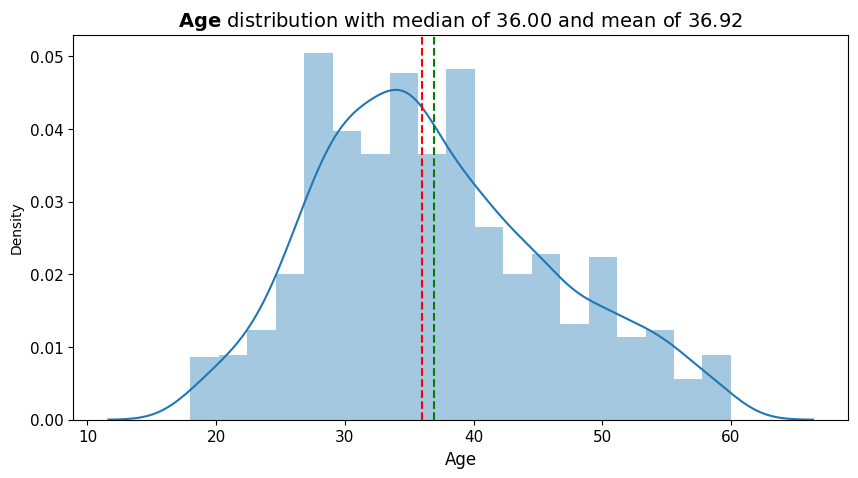

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




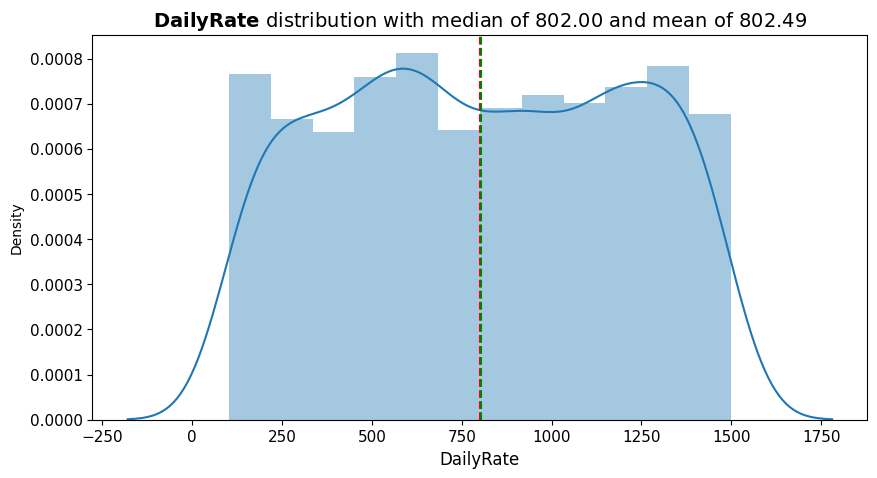

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




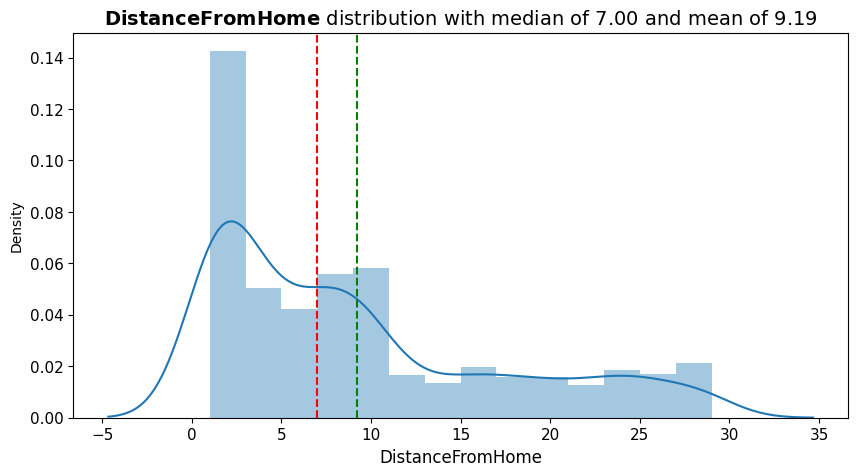

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




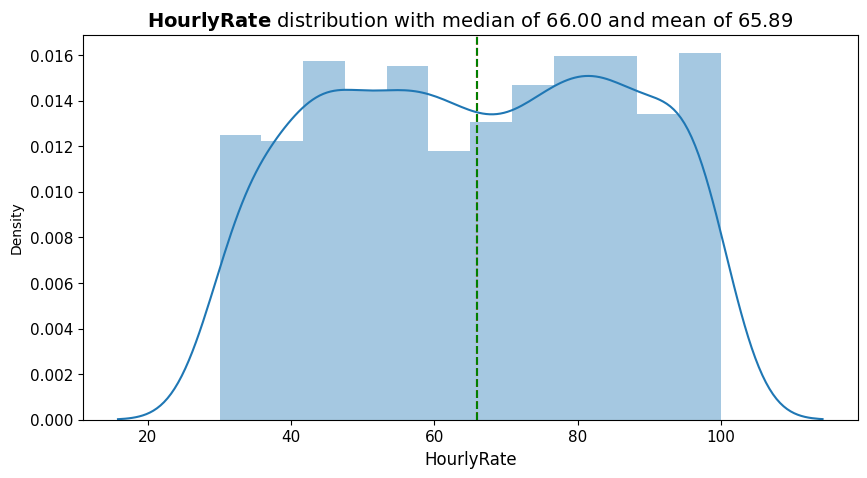

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




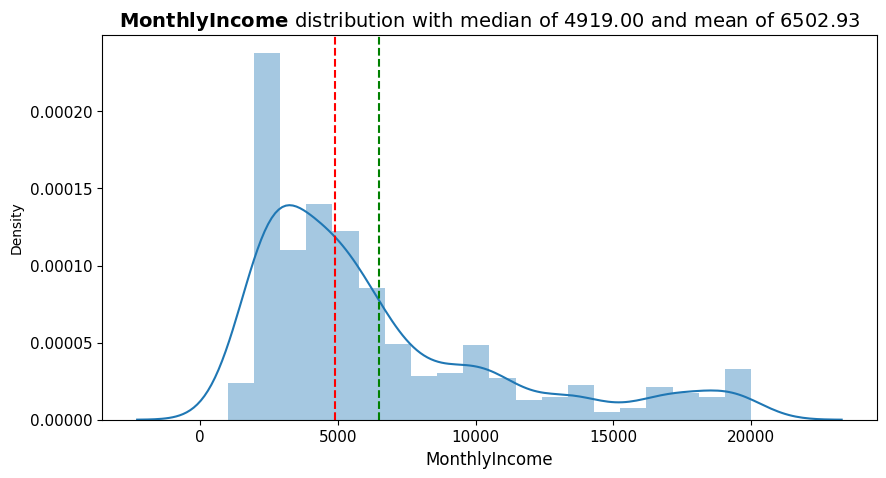

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




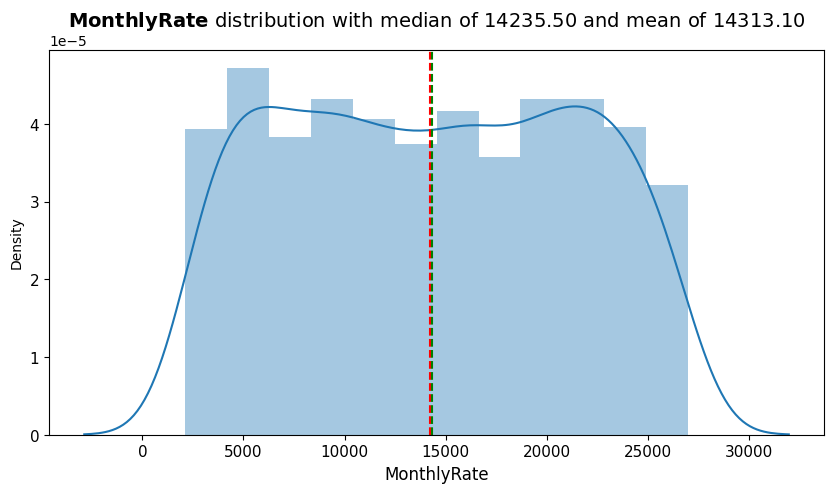

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




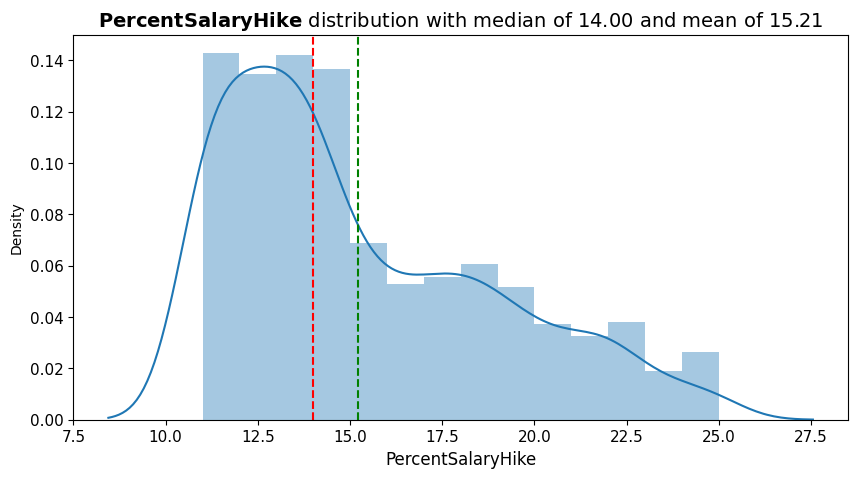

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




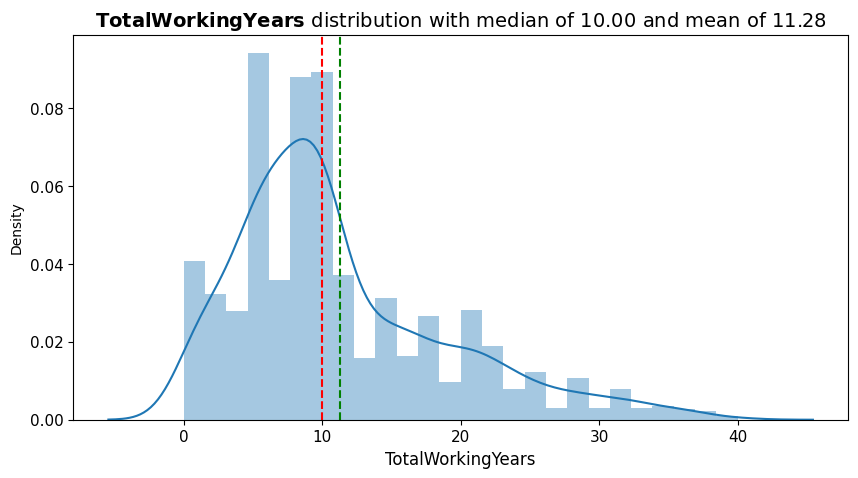

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




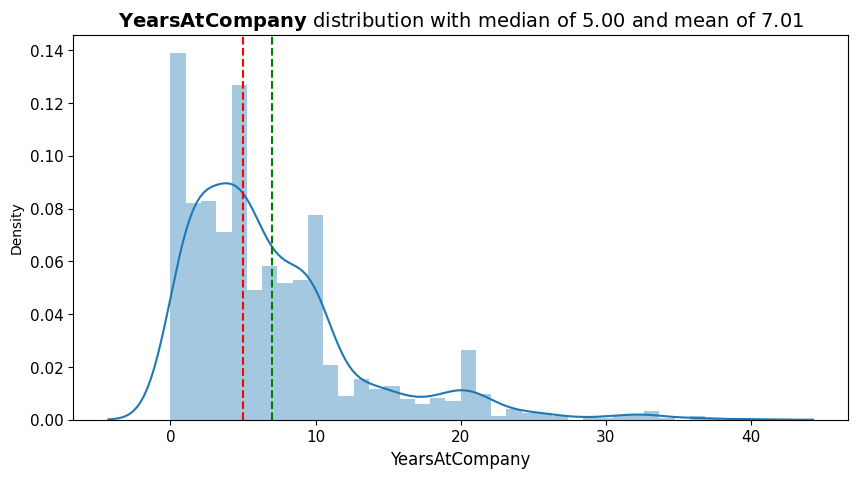

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




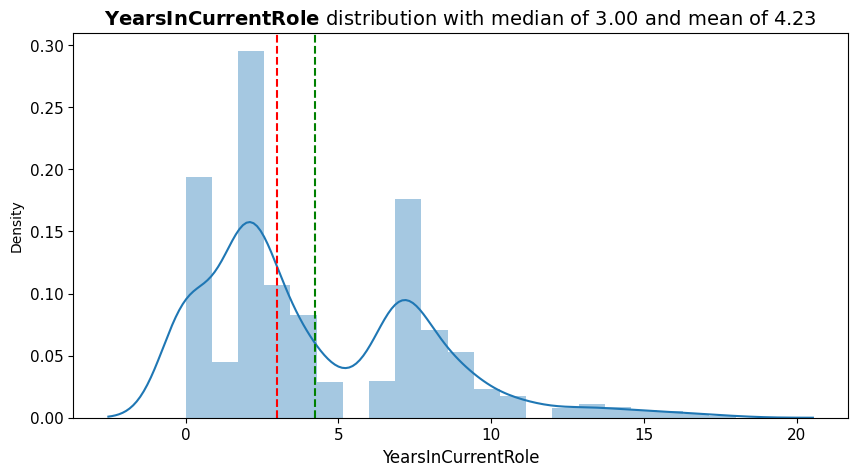

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




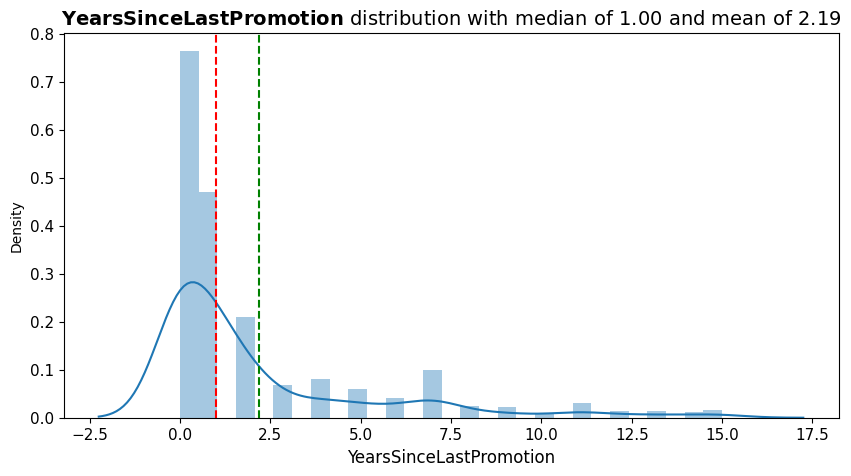

<ipython-input-20-829fe67ea272>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




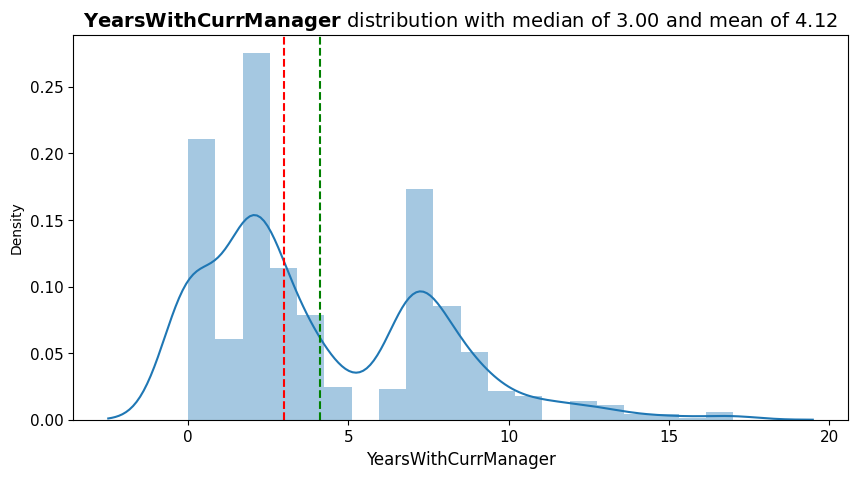

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in mt_10_val_col:
    plt.figure(figsize=(10, 5))
    sns.distplot(df.loc[:, i], kde=True)
    plt.title(r'$\bf{%s}$ distribution with median of %.2f and mean of %.2f' % \
              (i, (df.loc[:, i]).median(), df.loc[:, i].mean()),
              size=14)
    plt.xlabel(i, fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.axvline((df.loc[:, i]).median(), 0, linestyle='--',
                linewidth=1.5, color='r')
    plt.axvline((df.loc[:, i]).mean(), 0, linestyle='--',
                linewidth=1.5, color='g')
    plt.show()

**REMOVING OUTLIERS USING Z-SCORE METHOD**

<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




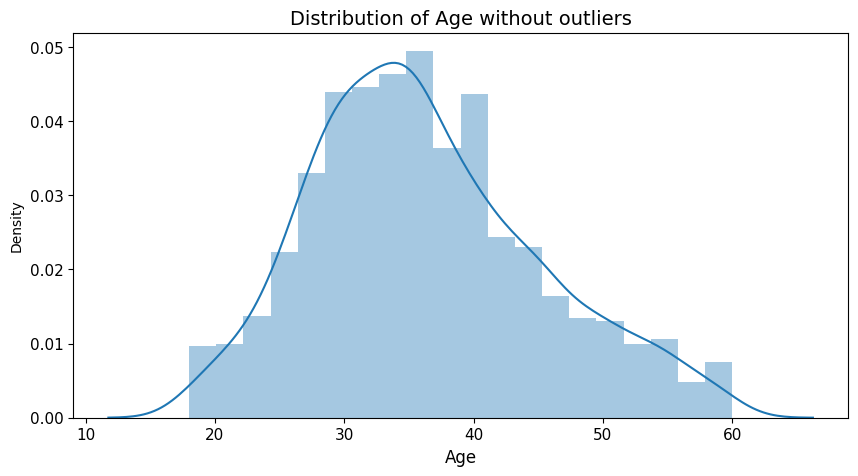

After removing outliers, the mean of Age is: 36.258111031002166
After removing outliers, the median of Age is: 35.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




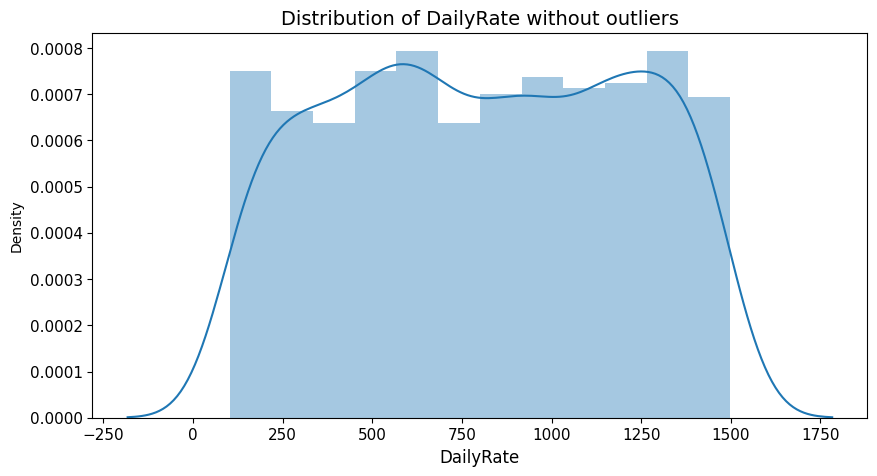

After removing outliers, the mean of DailyRate is: 806.0540735400144
After removing outliers, the median of DailyRate is: 807.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




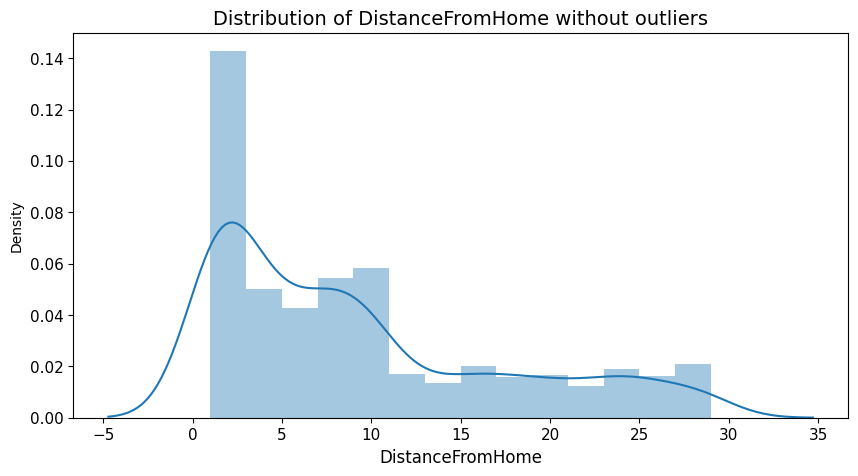

After removing outliers, the mean of DistanceFromHome is: 9.17664023071377
After removing outliers, the median of DistanceFromHome is: 7.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




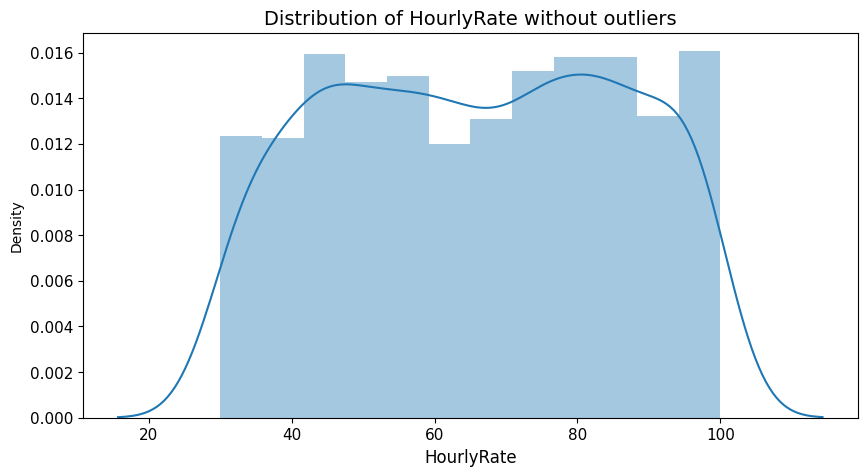

After removing outliers, the mean of HourlyRate is: 65.84715212689257
After removing outliers, the median of HourlyRate is: 66.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




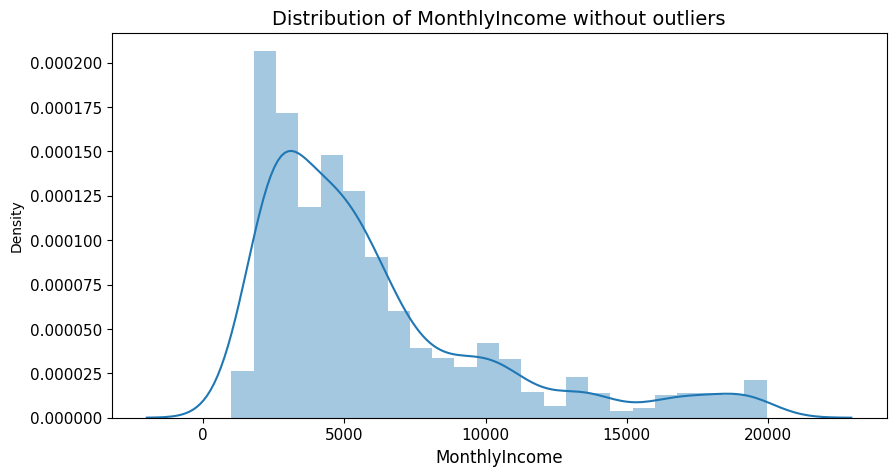

After removing outliers, the mean of MonthlyIncome is: 6025.91204037491
After removing outliers, the median of MonthlyIncome is: 4739.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




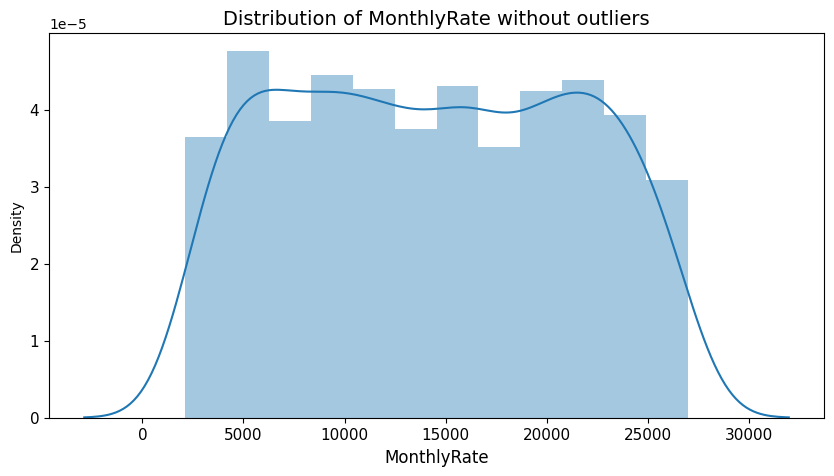

After removing outliers, the mean of MonthlyRate is: 14304.392213410238
After removing outliers, the median of MonthlyRate is: 14199.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




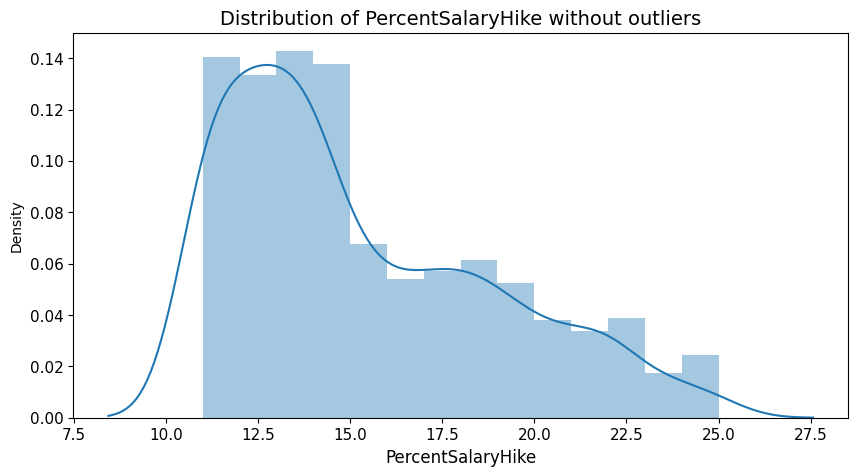

After removing outliers, the mean of PercentSalaryHike is: 15.21268925739005
After removing outliers, the median of PercentSalaryHike is: 14.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




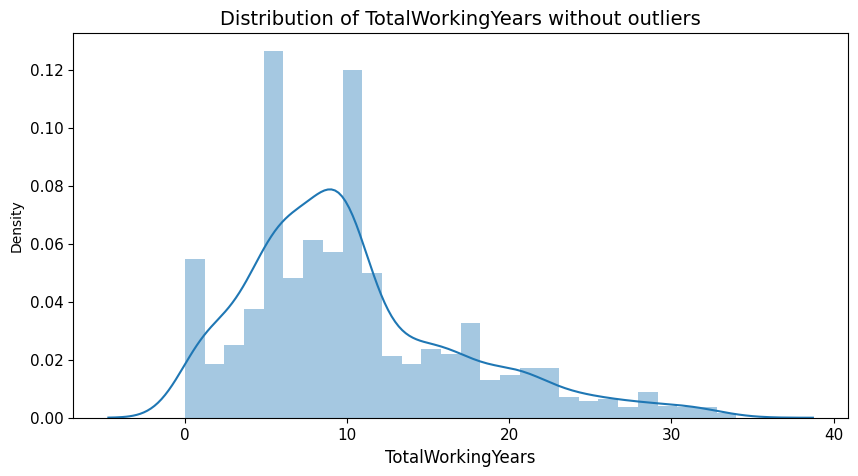

After removing outliers, the mean of TotalWorkingYears is: 10.302090843547225
After removing outliers, the median of TotalWorkingYears is: 9.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




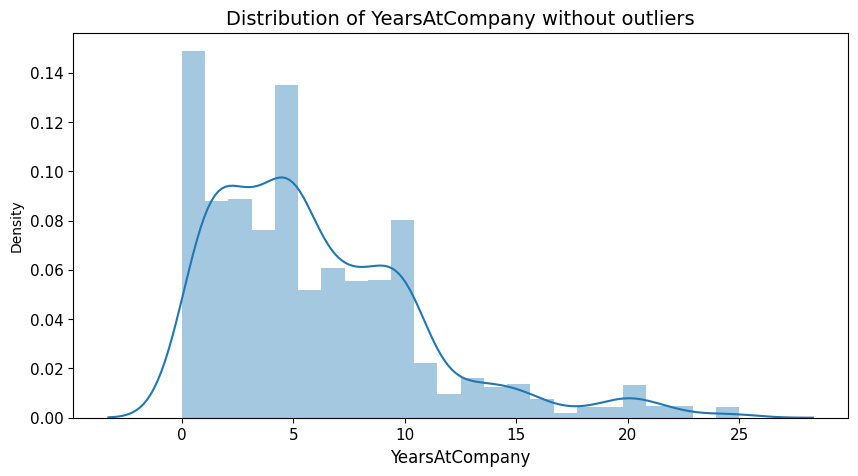

After removing outliers, the mean of YearsAtCompany is: 6.104542177361211
After removing outliers, the median of YearsAtCompany is: 5.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




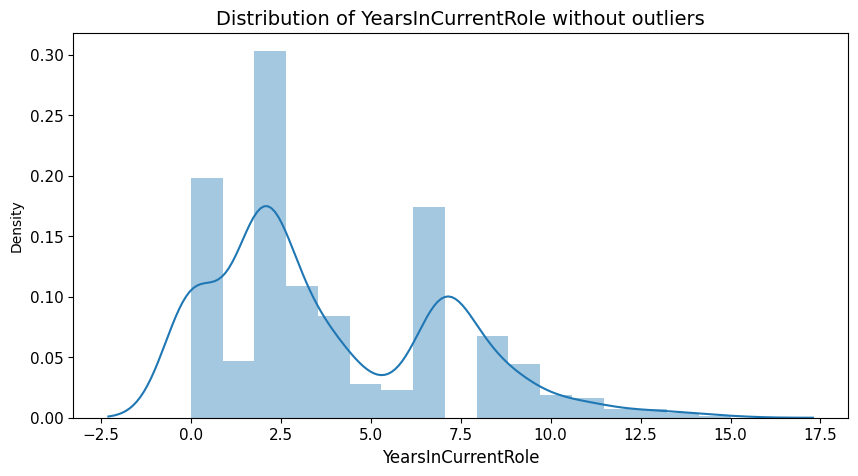

After removing outliers, the mean of YearsInCurrentRole is: 3.8673395818312906
After removing outliers, the median of YearsInCurrentRole is: 3.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




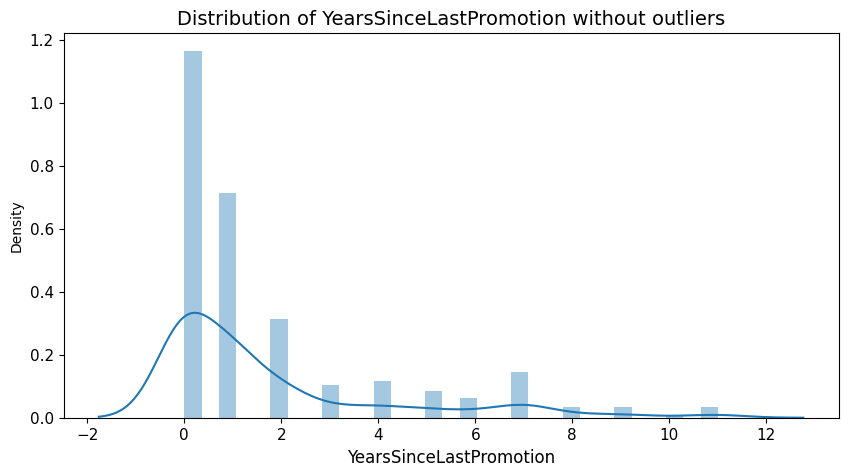

After removing outliers, the mean of YearsSinceLastPromotion is: 1.77577505407354
After removing outliers, the median of YearsSinceLastPromotion is: 1.0


<ipython-input-21-3cec8df241e5>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




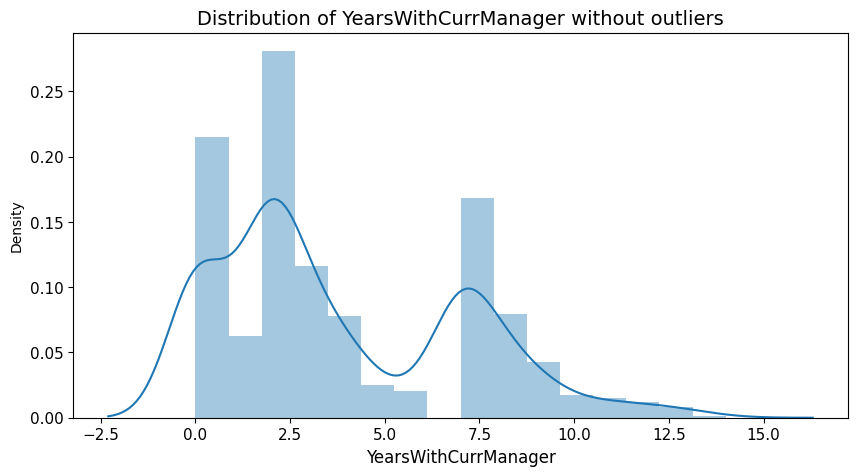

After removing outliers, the mean of YearsWithCurrManager is: 3.8002883922134103
After removing outliers, the median of YearsWithCurrManager is: 3.0


In [ ]:
from scipy.stats import zscore

z_scores = df[mt_10_val_col].apply(zscore)

upper_thresholds = df[mt_10_val_col].mean() + 3 * df[mt_10_val_col].std()
lower_thresholds = df[mt_10_val_col].mean() - 3 * df[mt_10_val_col].std()

outlier_rows = ((z_scores > 3) | (z_scores < -3)).any(axis=1)
df_no_outliers = df[~outlier_rows]

for i in mt_10_val_col:
    plt.figure(figsize=(10, 5))
    sns.distplot(df_no_outliers.loc[:, i], kde=True)
    plt.title('Distribution of ' + i + ' without outliers', size=14)
    plt.xlabel(i, fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.show()

    # Calculate mean and median of the column without outliers
    mean_no_outliers = df_no_outliers[i].mean()
    median_no_outliers = df_no_outliers[i].median()

    print(f"After removing outliers, the mean of {i} is: {mean_no_outliers}")
    print(f"After removing outliers, the median of {i} is: {median_no_outliers}")



In [ ]:
df = df_no_outliers

In [ ]:
#csv_file_path = '/content/data.csv'
#df.to_csv(csv_file_path, index=False)

In [ ]:
#Mapping encoded numeric data of ratings' columns to categories for better understanding
jobsatisfaction_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High',
}
df['JobSatisfaction'] = df['JobSatisfaction'].map(jobsatisfaction_mapping)

work_life_mapping = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best',
}
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(work_life_mapping)

<ipython-input-24-718643dc6155>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-718643dc6155>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['JobSatisfaction'].head()

0    Very High
1       Medium
2         High
3         High
4       Medium
Name: JobSatisfaction, dtype: object

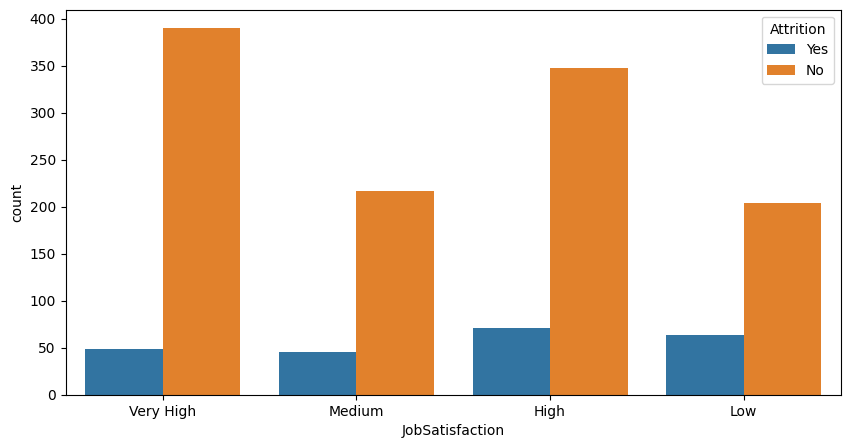

Attrition,No,Yes
JobSatisfaction,,
Low,0.761194,0.238806
Medium,0.828244,0.171756
High,0.830144,0.169856
Very High,0.888383,0.111617


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.show();
pd.crosstab(df.JobSatisfaction, df.Attrition,
normalize='index').reindex(index=['Low','Medium','High','Very High'])

<ipython-input-27-e2eab6f1c4e7>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-27-e2eab6f1c4e7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-27-e2eab6f1c4e7>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-27-e2eab6f1c4e7>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




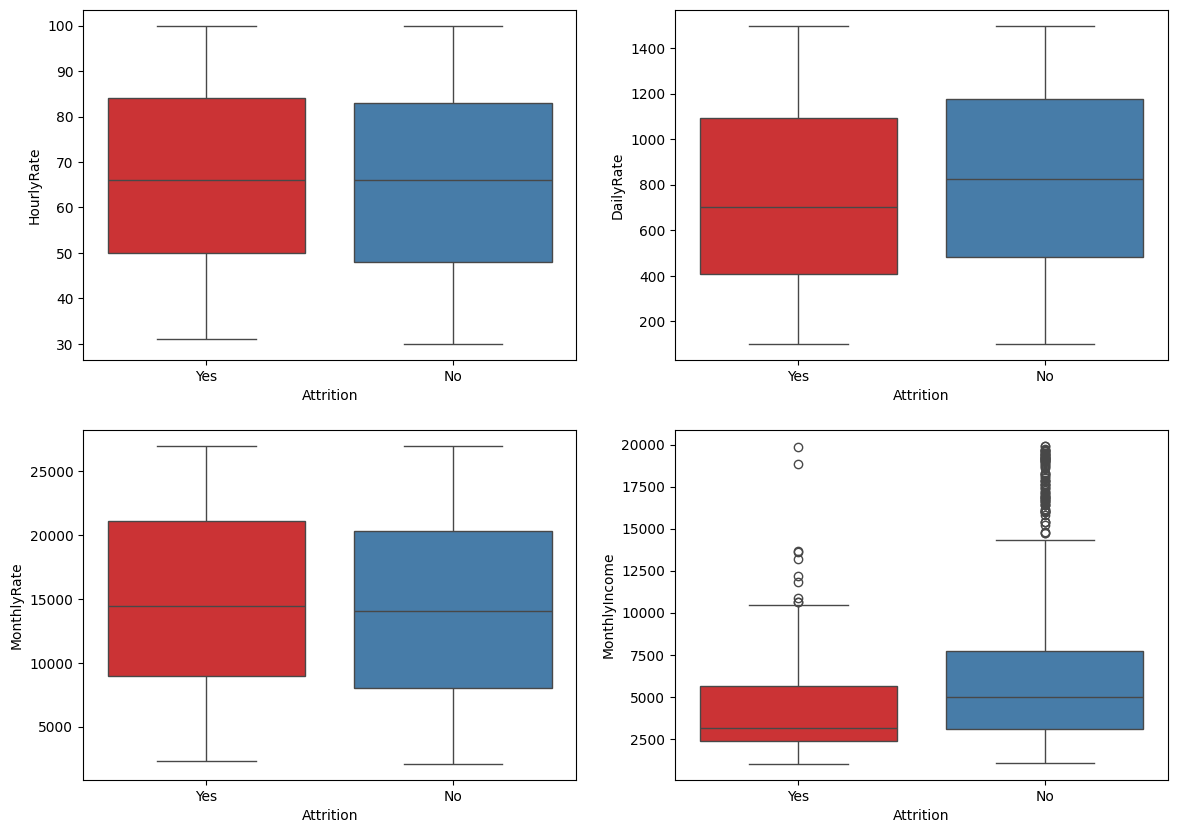

In [ ]:
f,axes = plt.subplots (2, 2, figsize=(14, 10), sharex=False)
sns.boxplot(x='Attrition', y= 'HourlyRate', data=df, ax=axes[0][0], palette='Set1')
sns.boxplot(x='Attrition', y= 'DailyRate', data=df, ax=axes[0][1], palette='Set1')
sns.boxplot(x='Attrition', y='MonthlyRate', data=df, ax=axes [1][0], palette='Set1')
sns.boxplot(x='Attrition', y="MonthlyIncome", data=df, ax=axes[1][1], palette='Set1')
plt.show();

From the above graph it can be seen that the employees who receive significantly lower monthly income are prone to show the attrition.

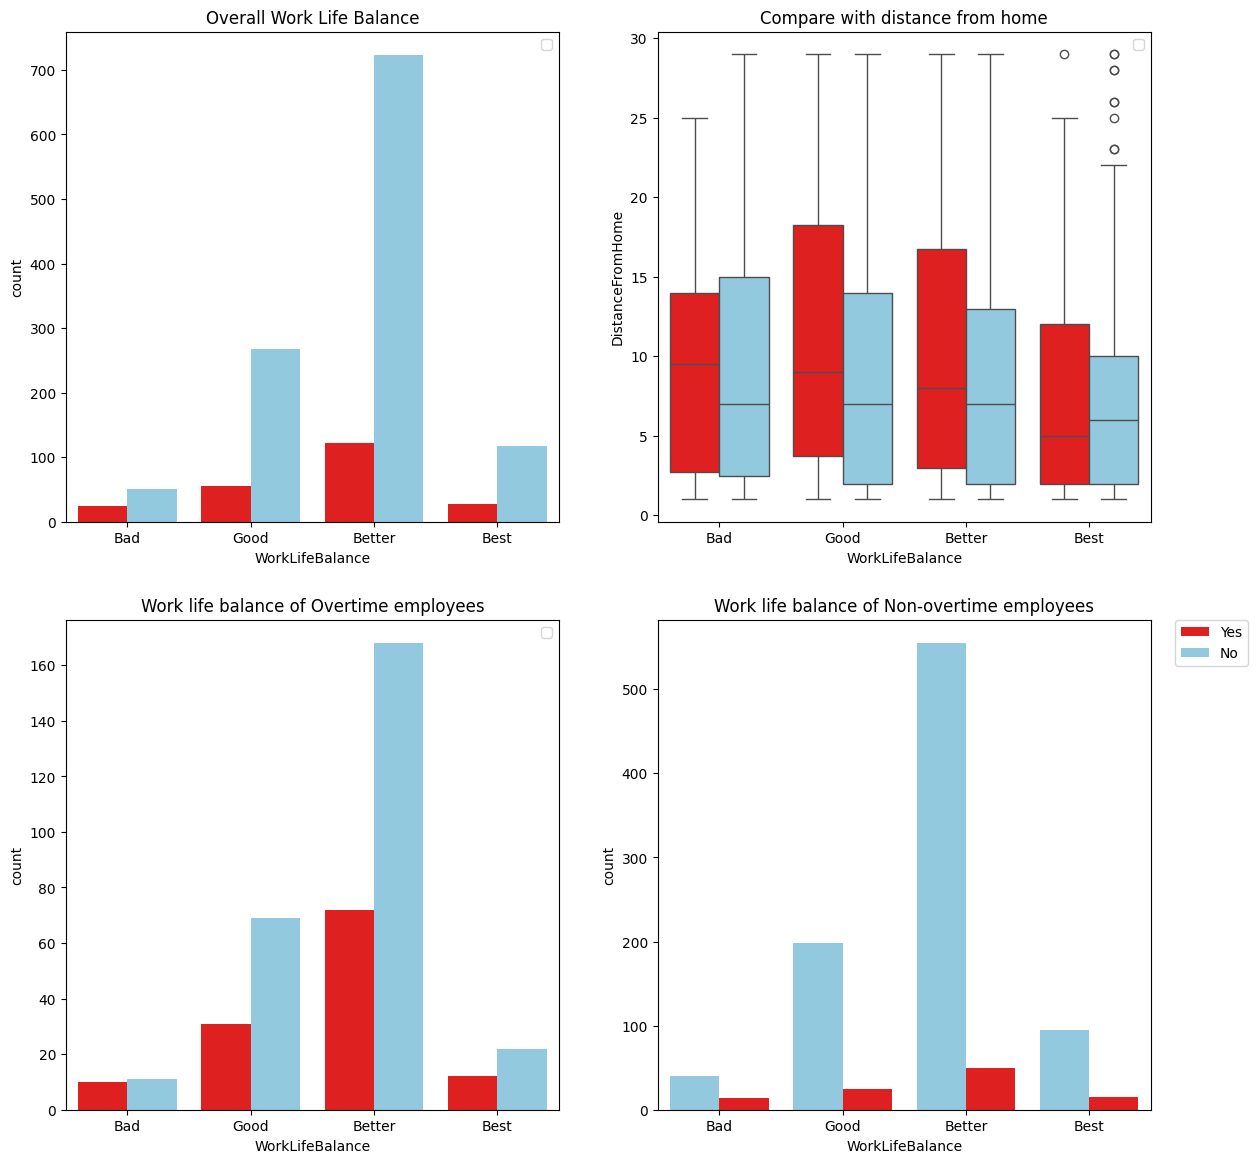

In [ ]:
_tmp_order = ['Bad','Good','Better','Best']

f, axes = plt.subplots(2, 2, figsize=(14, 14))
sns.countplot(x='WorkLifeBalance', hue='Attrition', palette={'Yes': 'r', 'No': 'skyblue'},
              data=df, order=_tmp_order, ax=axes[0][0])
axes[0][0].set_title('Overall Work Life Balance')
sns.boxplot(x='WorkLifeBalance', y='DistanceFromHome', hue='Attrition',
            palette={'Yes': 'r', 'No': 'skyblue'},
            data=df, order=_tmp_order, ax=axes[0][1])
axes[0][1].set_title('Compare with distance from home')
sns.countplot(x='WorkLifeBalance', hue='Attrition', palette={'Yes': 'r', 'No': 'skyblue'},
              data=df[df.OverTime == 'Yes'],
              order=_tmp_order, ax=axes[1][0])
axes[1][0].set_title('Work life balance of Overtime employees')
sns.countplot(x='WorkLifeBalance', hue='Attrition', palette={'Yes': 'r', 'No': 'skyblue'},
              data=df[df.OverTime != 'Yes'],
              order=_tmp_order, ax=axes[1][1])
axes[1][1].set_title('Work life balance of Non-overtime employees')
handles, labels = axes[0][0].get_legend_handles_labels()
axes[0, 0].legend(handles[:0], labels[:0])
axes[0, 1].legend(handles[:0], labels[:0])
axes[1, 0].legend(handles[:0], labels[:0])
axes[1, 1].legend(handles[:0], labels[:0])
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

The top-right chart shows that employees with a "Bad" work-life balance tend to have a longer distance from home, while those with a "Better" or "Best" work-life balance generally have shorter commute distances. This suggests that a shorter commute time can contribute to a better work-life balance for employees.

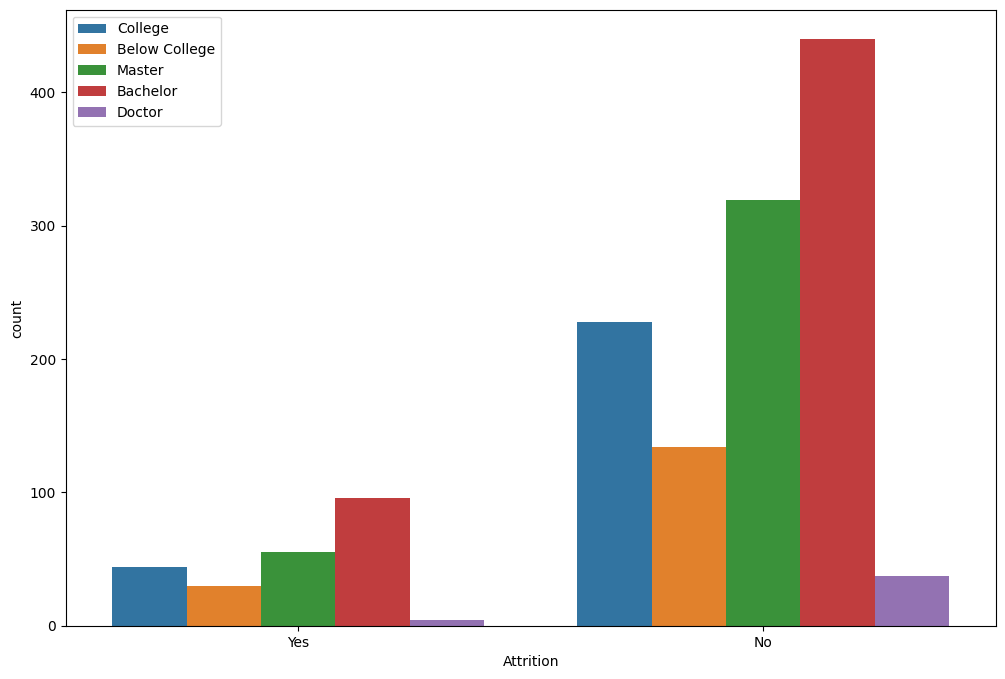

Attrition,No,Yes
Education,,
Below College,0.817073,0.182927
College,0.838235,0.161765
Bachelor,0.820896,0.179104
Master,0.852941,0.147059
Doctor,0.902439,0.097561


In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Attrition', hue='Education', data=df)
plt.legend(loc='best')
plt.show()
pd.crosstab(df.Education,
            df.Attrition,
            normalize='index').reindex(index=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])

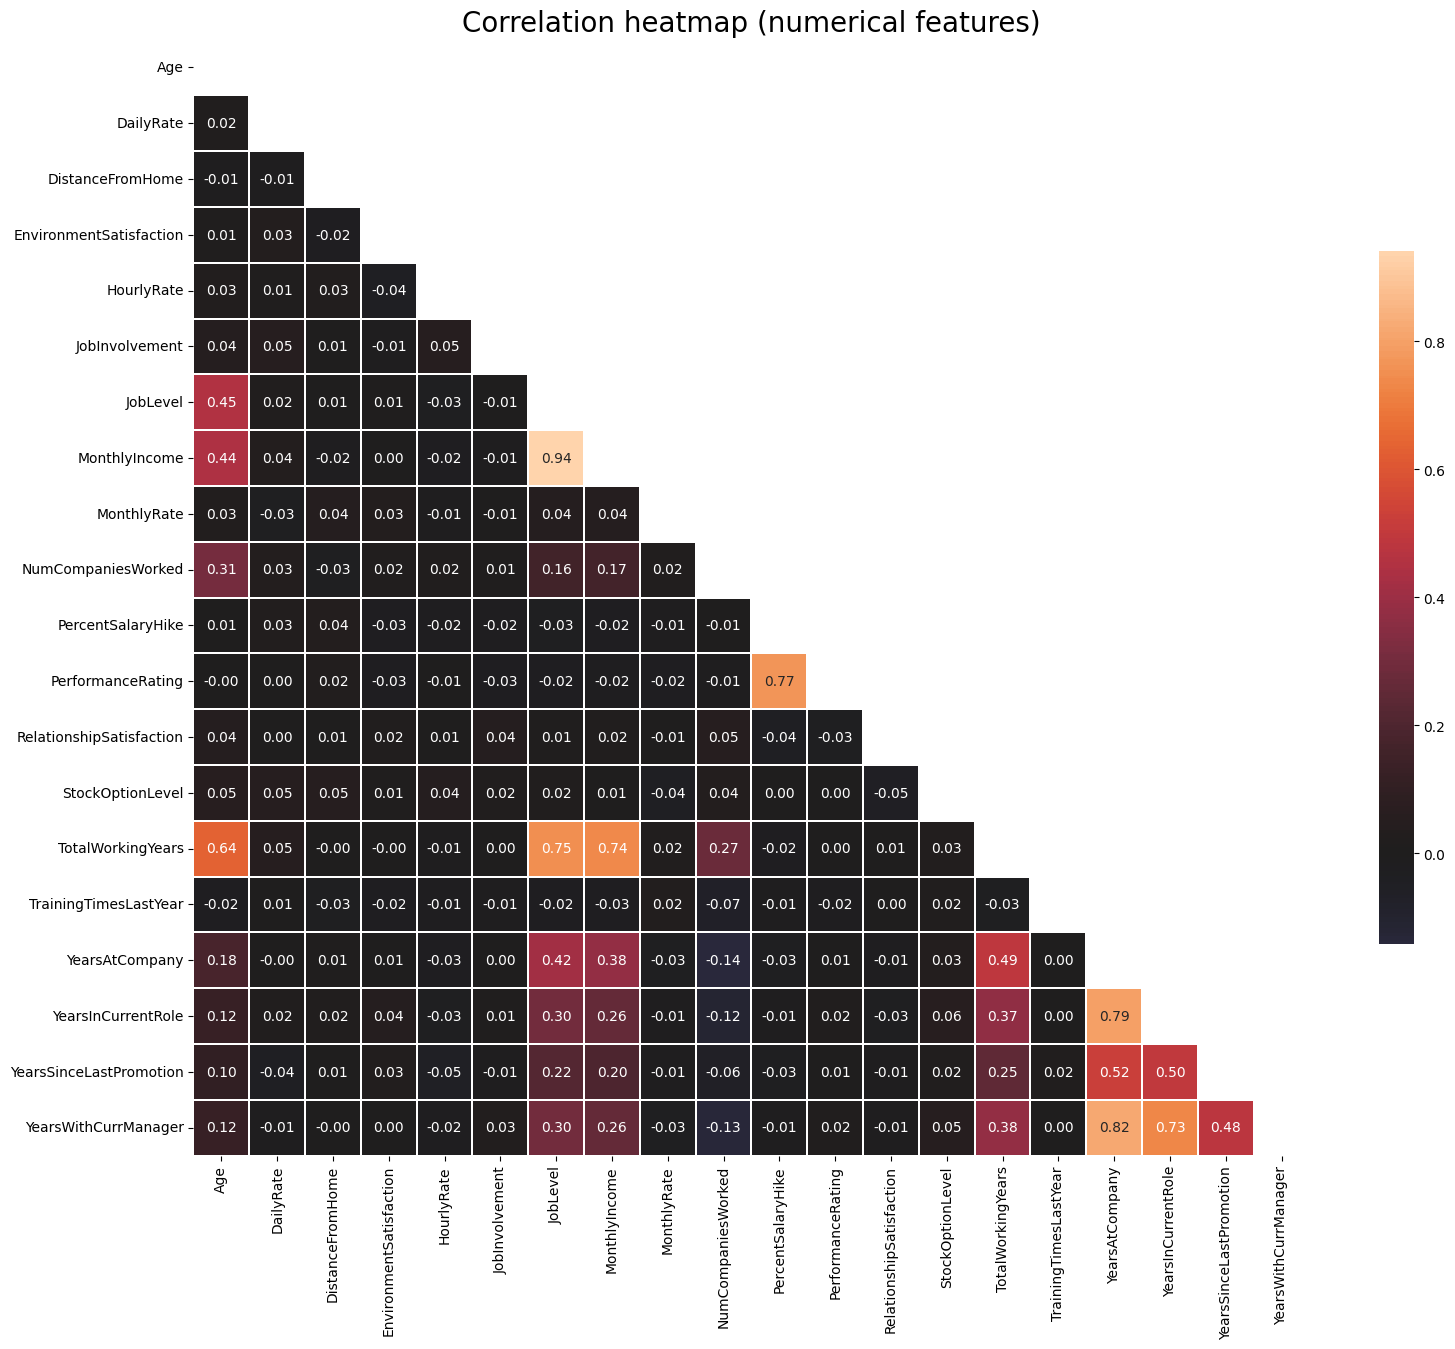

In [ ]:
import numpy as np
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

f, ax = plt.subplots(figsize=(18, 18))
corr = numerical_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, linewidths=.1, fmt='.2f', ax=ax,
            center=0, square=True, cbar_kws={'shrink': .5}
           )
plt.title('Correlation heatmap (numerical features)', size=20)
plt.show()

**Feature Engineering**

In [ ]:
age_bins = [0, 30, 50, float('inf')]  # Define age group bins
age_labels = ['Young', 'Middle-aged', 'Senior']  # Define age group labels
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
print(df[['Age', 'Age Group']].head())

   Age    Age Group
0   41  Middle-aged
1   49  Middle-aged
2   37  Middle-aged
3   33  Middle-aged
4   27        Young


In [ ]:
# Employee Engagement: Calculate an engagement score
df['EmployeeEngagement'] = (df['JobInvolvement'] + df['EnvironmentSatisfaction'] + df['RelationshipSatisfaction']) / 3

In [ ]:
# Training Frequency: Convert "Training Times Last Year" into a categorical variable indicating the frequency of training attendance
bins = [0,2,4,6 ,float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
df['TrainingFrequency'] = pd.cut(df['TrainingTimesLastYear'], bins=bins, labels=labels, right=False)


In [ ]:
total_exp_col = 'TotalWorkingYears'
num_prev_com_col = 'NumCompaniesWorked'
# Calculate the 'First Job Indicator' feature
df['First Job Indicator'] = np.where(df[num_prev_com_col] == 0, 1, 0)

# Calculate the 'Job Hopper Index' feature
df['Job Change Index'] = np.where(df[num_prev_com_col] == 0,
                                  0.,
                                  df[total_exp_col] / df[num_prev_com_col]
                                 )

In [ ]:
#Dropping redundant columns
df.drop(['Age','JobInvolvement','EnvironmentSatisfaction','RelationshipSatisfaction','TrainingTimesLastYear','TotalWorkingYears','NumCompaniesWorked'], axis=1, inplace = True)

In [ ]:
#Mapping encoded numeric data of ratings' columns to categories for better understanding
jobsatisfaction_mapping = {
    'Low': 1,
    'Medium' : 2,
    'High': 3,
    'Very High': 4,
}
df['JobSatisfaction'] = df['JobSatisfaction'].map(jobsatisfaction_mapping)

work_life_mapping = {
    'Bad':1,
    'Good':2,
    'Better':3,
    'Best':4,
}
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(work_life_mapping)

In [ ]:
csv_file_path = '/content/data1.csv'
df.to_csv(csv_file_path, index=False)

**Splitting the data into training and test data**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Attrition']
y = df.loc[:, 'Attrition']
SEED=42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=SEED)
print("Training data set shape: %s\nTesting data set shape: %s" % (X_train.shape, X_test.shape))

Training data set shape: (1109, 28)
Testing data set shape: (278, 28)


**Converting Target Variable to Mapping Value**

In [ ]:
target_map = {'Yes': 1, 'No': 0}
y_train = y_train.apply(lambda x: target_map[x])
y_test = y_test.apply(lambda x: target_map[x])

In [ ]:
print('Distribution of training:\n%s' % y_train.value_counts())
print('\n')
print('Distribution of testing:\n%s' % y_test.value_counts())

Distribution of training:
Attrition
0    932
1    177
Name: count, dtype: int64


Distribution of testing:
Attrition
0    226
1     52
Name: count, dtype: int64


In [ ]:
X_train

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobLevel,JobRole,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age Group,EmployeeEngagement,TrainingFrequency,First Job Indicator,Job Change Index
1436,Travel_Rarely,501,Sales,5,Below College,Medical,Male,58,1,Sales Representative,...,3,2,2,1,2,Young,3.333333,Very High,0,2.000000
308,Non-Travel,390,Research & Development,1,Master,Life Sciences,Male,32,2,Healthcare Representative,...,3,5,3,1,2,Senior,3.000000,Medium,0,6.000000
1229,Travel_Rarely,369,Research & Development,8,College,Life Sciences,Female,92,2,Manufacturing Director,...,3,1,0,0,0,Middle-aged,2.333333,Medium,0,9.000000
1036,Travel_Frequently,523,Research & Development,2,Bachelor,Life Sciences,Male,94,1,Laboratory Technician,...,1,2,2,2,2,Middle-aged,2.666667,Medium,0,1.166667
1292,Travel_Frequently,766,Sales,20,Bachelor,Life Sciences,Male,83,2,Sales Executive,...,3,2,1,2,2,Middle-aged,3.333333,Very High,0,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,Travel_Rarely,448,Research & Development,16,Bachelor,Life Sciences,Female,84,3,Manufacturing Director,...,2,4,2,3,3,Middle-aged,3.333333,Medium,0,3.000000
1200,Travel_Rarely,528,Human Resources,1,Bachelor,Life Sciences,Female,44,1,Human Resources,...,3,2,2,2,2,Middle-aged,2.333333,Medium,0,2.000000
1374,Travel_Rarely,605,Sales,21,Bachelor,Life Sciences,Female,72,4,Manager,...,2,1,0,0,0,Senior,3.333333,Medium,0,7.250000
910,Travel_Rarely,373,Research & Development,1,College,Life Sciences,Male,47,1,Research Scientist,...,3,1,0,0,1,Young,3.666667,Medium,0,1.000000


In [ ]:
data_type = df['Age Group'].dtype
print("Data type of the column:", data_type)

data_type = df['TrainingFrequency'].dtype
print("Data type of the column:", data_type)

Data type of the column: category
Data type of the column: category


In [ ]:
obj_val_col = []
le_10_val_col = []
mt_10_val_col = []

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        obj_val_col.append(col)
    elif col == 'Age Group':  # Check specifically for the 'Age Group' column
        obj_val_col.append(col)
    elif col == 'TrainingFrequency':  # Check specifically for the 'Training Frequency' column
        obj_val_col.append(col)
    elif (len(X_train[col].unique()) <= 10) & (X_train[col].dtype == 'int64'):
        le_10_val_col.append(col)
    elif (len(X_train[col].unique()) > 10) & (X_train[col].dtype == 'int64'):
        mt_10_val_col.append(col)

print('The object columns:\n%s' % obj_val_col)
print('\n\n')
num_val_col = X_train.columns.difference(obj_val_col)
print('The numerical columns:\n%s' % num_val_col)

The object columns:
['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Age Group', 'TrainingFrequency']



The numerical columns:
Index(['DailyRate', 'DistanceFromHome', 'EmployeeEngagement',
       'First Job Indicator', 'HourlyRate', 'Job Change Index', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
#Function to do one-hot encoding for all categorical features
def encoding_feature(df,
                     object_col_list: list=obj_val_col, numeric_col_list: list=num_val_col,
                     sample_ind: bool=False):  # sample_ind: the boolean to display sample head records; default is False

    categorical_df = pd.DataFrame()
    for i in object_col_list: #object_col_list: the list containing the name of object columns
        tmp_ = pd.get_dummies(data=df.loc[:, i],
                              columns=i,
                              prefix=i,
                              drop_first=True
                             )
        categorical_df = pd.concat([categorical_df, tmp_], axis=1)

    out_df = pd.concat([df.loc[:, numeric_col_list], categorical_df], axis=1) # numeric_col_list: the list containing the name of numeric columns
    if sample_ind:
        display(out_df.head(5))

    return out_df

X_train = encoding_feature(X_train, sample_ind=True)
X_test = encoding_feature(X_test, sample_ind=True)

,DailyRate,DistanceFromHome,EmployeeEngagement,First Job Indicator,HourlyRate,Job Change Index,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age Group_Middle-aged,Age Group_Senior,TrainingFrequency_Medium,TrainingFrequency_High,TrainingFrequency_Very High
1436,501,5,3.333333,0,58,2.000000,1,1,2380,25479,...,False,True,False,True,True,False,False,False,False,True
308,390,1,3.000000,0,32,6.000000,2,3,5660,17056,...,False,False,False,False,True,False,True,True,False,False
1229,369,8,2.333333,0,92,9.000000,2,1,6516,5041,...,False,False,True,False,True,True,False,True,False,False
1036,523,2,2.666667,0,94,1.166667,1,4,3722,21081,...,False,False,True,False,True,True,False,True,False,False
1292,766,20,3.333333,0,83,3.500000,2,4,4127,19188,...,True,False,False,False,False,True,False,False,False,True


,DailyRate,DistanceFromHome,EmployeeEngagement,First Job Indicator,HourlyRate,Job Change Index,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age Group_Middle-aged,Age Group_Senior,TrainingFrequency_Medium,TrainingFrequency_High,TrainingFrequency_Very High
689,129,4,2.000000,0,84,1.00,1,1,2973,13008,...,False,False,False,True,False,False,False,True,False,False
223,119,3,2.333333,1,76,0.00,3,3,10609,9647,...,True,False,False,False,False,True,False,False,False,True
1005,332,17,1.666667,0,51,10.00,3,1,7988,9769,...,False,False,False,True,False,False,False,True,False,False
720,138,22,2.000000,0,48,1.75,1,3,2132,11539,...,False,False,True,False,True,True,False,True,False,False
850,862,2,3.000000,0,76,1.00,1,1,2827,14947,...,False,True,False,False,False,True,False,True,False,False


In [ ]:
import plotly.offline as py
def plot_correlation_matrix(predictor_df: pd.DataFrame, target_label: pd.Series):
    corr = pd.concat([predictor_df, target_label], axis=1).corr()
    matrix_cols = corr.columns.tolist()
    corr_array = np.array(corr)
    trace = go.Heatmap(x=matrix_cols,
                       y=matrix_cols,
                       z=corr_array,
                       colorscale='Viridis',
                       colorbar=dict()
                      )

    layout = go.Layout(dict(title='Correlation Matrix',
                            autosize=False,
                            height=900,
                            width=900,
                            margin=dict(r=0, l=210,
                                        t=25, b=210
                                       ),
                            xaxis=dict(tickfont=dict(size=9)),
                            yaxis=dict(tickfont=dict(size=9))
                           )
                      )
    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)


plot_correlation_matrix(X_train, y_train)

**SCALING THE NUMERICAL FEATURES TO A STANDARDIZED SCALE**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train = X_train_scaled_df
X_test = X_test_scaled_df

In [ ]:
X_train

,DailyRate,DistanceFromHome,EmployeeEngagement,First Job Indicator,HourlyRate,Job Change Index,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age Group_Middle-aged,Age Group_Senior,TrainingFrequency_Medium,TrainingFrequency_High,TrainingFrequency_Very High
0,-0.759984,-0.504157,1.064811,-0.404591,-0.363013,-0.552209,-0.944515,-1.558664,-0.862003,1.576933,...,-0.545047,3.823574,-0.911061,1.454362,1.563362,-1.407545,-0.335167,-1.566789,-0.438718,4.753498
1,-1.035510,-1.002585,0.474373,-0.404591,-1.643236,0.353487,0.030780,0.254192,-0.101140,0.383693,...,-0.545047,-0.261535,-0.911061,-0.687587,1.563362,-1.407545,2.983586,0.638248,-0.438718,-0.210371
2,-1.087636,-0.130337,-0.706502,-0.404591,1.311126,1.032759,0.030780,-1.558664,0.097426,-1.318407,...,-0.545047,-0.261535,1.097621,-0.687587,1.563362,0.710457,-0.335167,0.638248,-0.438718,-0.210371
3,-0.705376,-0.877978,-0.116064,-0.404591,1.409604,-0.740896,-0.944515,1.160620,-0.550699,0.953893,...,-0.545047,-0.261535,1.097621,-0.687587,1.563362,0.710457,-0.335167,0.638248,-0.438718,-0.210371
4,-0.102198,1.364944,1.064811,-0.404591,0.867971,-0.212573,0.030780,1.160620,-0.456751,0.685722,...,1.834705,-0.261535,-0.911061,-0.687587,-0.639647,0.710457,-0.335167,-1.566789,-0.438718,4.753498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,-0.891542,0.866517,1.064811,-0.404591,0.917211,-0.325785,1.006075,1.160620,0.428912,0.793387,...,-0.545047,-0.261535,-0.911061,1.454362,1.563362,0.710457,-0.335167,0.638248,-0.438718,-0.210371
1105,-0.692965,-1.002585,-0.706502,-0.404591,-1.052364,-0.552209,-0.944515,1.160620,-0.672947,-1.442222,...,-0.545047,-0.261535,-0.911061,-0.687587,1.563362,0.710457,-0.335167,0.638248,-0.438718,-0.210371
1106,-0.501834,1.489551,1.064811,-0.404591,0.326338,0.636517,1.981370,1.160620,2.732378,-0.366421,...,-0.545047,-0.261535,1.097621,-0.687587,1.563362,-1.407545,2.983586,0.638248,-0.438718,-0.210371
1107,-1.077707,-1.002585,1.655248,-0.404591,-0.904646,-0.778633,-0.944515,0.254192,-1.130392,0.361735,...,-0.545047,-0.261535,1.097621,-0.687587,-0.639647,-1.407545,-0.335167,0.638248,-0.438718,-0.210371


**MACHINE LEARNING MODEL DEVELOPMENT**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
import plotly.tools as tls


In [ ]:
#Function to predict and evaluate the provided algorithm by using Plotly library, to visualize the confusion matrix, ROC curve as well as provide the feature importances.
def prediction_evaluation (algorithm, X_train, X_test, y_train, y_test,
                           predictor_cols, cf = 'features'):  #cf: toggle the mode on how to get the informaiton out from the model,the input only accepts 2 possible list of values.
         #LOV - 'coefficients': specifically for logistic regression
            # - 'features': specifically for tree-based model

    if cf not in ['features', 'coefficients']:
        # Exception case - return None
        print("ERROR: Mode Toggle (cf parameters) is not in LOV. Please recheck")
        return None, None

    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    y_prob = algorithm.predict_proba(X_test)
    algorithm_name = str(algorithm).split('(', 1)[0]

    if cf == 'coefficients':
        coeff = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == 'features':
        coeff = pd.DataFrame(algorithm.feature_importances_)

    col_df = pd.DataFrame(predictor_cols)
    coef_smry = pd.merge(coeff, col_df, left_index=True, right_index=True, how='left')
    coef_smry.columns = ['coefficients', 'features']
    coef_smry = coef_smry.sort_values(by='coefficients', ascending=False)
    conf_matrix = confusion_matrix(y_test, y_pred)
    # compute metric
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    accuracy_  = ((tp + tn) / (tp + tn + fp + fn))
    precision_ = (tp / (tp + fp))
    recall_    = (tp / (tp + fn))
    f1_score_  = f1_score(y_test, y_pred)
    model_roc_auc = roc_auc_score(y_test, y_pred)

    # Print report
    print(algorithm)
    print("\nClassification report: \n", classification_report(y_test, y_pred))
    print("\nAccuracy Score: ", np.round(accuracy_score(y_test, y_pred), 4))
    print("F1 Score: ", np.round(f1_score_, 4))
    print("Area Under Curve: ", np.round(model_roc_auc, 4), "\n")

    # Trace 1: plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ['Not Leave', 'Leave'],
                        y = ['Not Leave', 'Leave'],
                        showscale = False,
                        colorscale = 'Picnic',
                        name = "Confusion Matrix"
                       )

    # Trace 2: plot model metrics
    show_metrics = pd.DataFrame(data=[[accuracy_ , precision_, recall_, f1_score_]])
    show_metrics = show_metrics.T
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x=(show_metrics[0].values),
                    y=['Accuracy', 'Precision', 'Recall', 'F1 score'],
                    text=np.round_(show_metrics[0].values,4),
                    name='',
                    textposition='auto',
                    orientation='h',
                    opacity=0.8,
                    marker=dict(color=colors,
                                line=dict(color='#000000',
                                          width=1.5)
                               )
                   )

    # Trace 3: plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
    trace3 = go.Scatter(x = fpr,
                        y = tpr,
                        name = "ROC: " + str(model_roc_auc),
                        line = dict(color = 'rgb(22, 96, 197)',
                                    width = 2
                                   )
                       )
    trace4 = go.Scatter(x = [0, 1],
                        y = [0, 1],
                        line = dict(color = 'rgb(205, 12, 24)',
                                     width = 1.5,
                                     dash = 'dot'
                                   )
                       )

    # Trace 4: plot precision-recall curve
    __precision, __recall, t = precision_recall_curve(y_test, y_prob[:, 1])
    trace5 = go.Scatter(x=__recall,
                        y=__precision,
                        name="Precision %s" % str(__precision),
                        line=dict(color=('lightcoral'),
                                  width = 2),
                        fill='tozeroy'
                       )

    # Trace 5: plot coeffs
    trace6 = go.Bar(x = coef_smry['features'],
                    y = coef_smry['coefficients'],
                    name = "coefficients",
                    marker = dict(color = coef_smry['coefficients'],
                                  colorscale = 'Picnic',
                                  line = dict(width = .6, color = 'black')
                                 )
                   )

    # subplots
    fig = tls.make_subplots(rows = 3, cols = 2,
                            specs = [[{}, {}],
                                     [{}, {}],
                                     [{'colspan': 2}, None]],
                            subplot_titles = ('Confusion Matrix',
                                              'Metrics',
                                              'Receiver Operating Characteristics (ROC)',
                                              'Precision - Recall curve',
                                              'Feature Importances'
                                             )
                           )

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 2, 1)
    fig.append_trace(trace4, 2, 1)
    fig.append_trace(trace5, 2, 2)
    fig.append_trace(trace6, 3, 1)

    fig['layout'].update(showlegend = False, title = "Model Performance of {}".format(algorithm_name),
                         autosize = False,
                         height = 1000,
                         width = 800,
                         plot_bgcolor = 'rgba(240, 240, 240, 0.95)',
                         paper_bgcolor = 'rgba(240, 240, 240, 0.95)',
                         margin = dict(b = 195)
                        )
    fig['layout']['xaxis1'].update(dict(title="Prediction"))
    fig['layout']['yaxis1'].update(dict(title="Actual"))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig['layout']['xaxis3'].update(dict(title="False Positive Rate"))
    fig['layout']['yaxis3'].update(dict(title='True Positive Rate'))
    fig["layout"]["xaxis4"].update(dict(title="recall"),
                                   range=[0, 1.05])
    fig["layout"]["yaxis4"].update(dict(title="precision"),
                                   range=[0, 1.05])
    fig['layout']['xaxis5'].update(dict(showgrid=True,
                                        tickfont=dict(size = 10),
                                        tickangle=90
                                       )
                                  )
    fig.layout.titlefont.size = 14
    py.iplot(fig)
    return y_pred, y_prob


**Decision Tree**

In [ ]:
!pip install scikit-plot
import graphviz
import scikitplot as skplt

In [ ]:
tree_clf = tree.DecisionTreeClassifier(random_state=SEED, max_depth=3)
_ = prediction_evaluation(tree_clf, X_train, X_test,
                                            y_train, y_test, X_train.columns,
                                            'features')


DecisionTreeClassifier(max_depth=3, random_state=42)

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       226
           1       0.75      0.17      0.28        52

    accuracy                           0.83       278
   macro avg       0.79      0.58      0.59       278
weighted avg       0.82      0.83      0.79       278


Accuracy Score:  0.8345
F1 Score:  0.2812
Area Under Curve:  0.5799 



<ipython-input-54-3e9944b78969>:2: DeprecationWarning:

`round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



The model has high accuracy but a low precision and recall for predicting employee turnover. This means that the model is good at identifying employees who will stay with the company, but it misses a significant number of employees who will leave and hence may note be a suitable choice in this case.

We can see that the accuracy is high (0.83), but it did not effectively capture the churn employees — only 0.17 in recall score (employees who left the company).
The top two importance features are OverTime and Job Level.

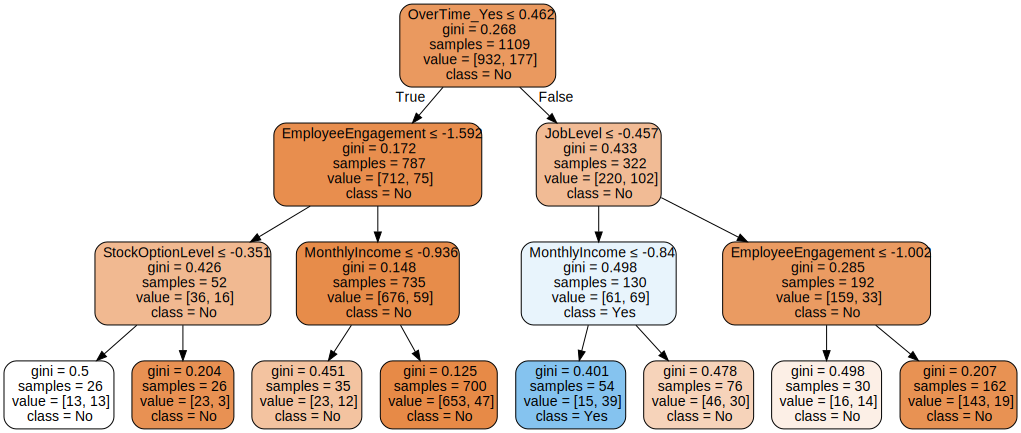

In [ ]:
dot_data = tree.export_graphviz(tree_clf, out_file=None,
                                feature_names=X_train.columns,
                                class_names=['No', 'Yes'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('../img/output/model_decision tree_employee attrition', view=False)
graph

**XGBOOST**

In [ ]:
xgb_clf = xgboost.XGBClassifier(random_state=SEED, n_jobs=-1, learning_rate=0.1,
                                max_depth=3, n_estimators=100)
_ = prediction_evaluation(xgb_clf, X_train, X_test,
                                            y_train, y_test, X_train.columns, "features")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       226
           1       0.76      0.25      0.38        52

    accuracy                           0.85       278
   macr

<ipython-input-56-936cc7f1379e>:3: DeprecationWarning:

`round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



The above XGBoost may not be optimal, we can tune the hyperparameters of the model by using Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgboost.XGBClassifier(random_state=SEED, n_jobs=-1)
params = {'n_estimators': [50, 100, 200, 300],
          'learning_rate': [0.01, 0.05, 0.1, 0.15],
          'min_child_weight': [1, 2, 3, 5, 10],
          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 1],
          'subsample': [0.6, 0.7, 0.8],
          'colsample_bytree': [0.6, 0.7, 0.8],
          'max_depth': [3, 4, 5],
         }
folds = 5
param_comb = 800
random_search = RandomizedSearchCV(xgb_clf, param_distributions=params,
                                   n_iter=param_comb, scoring='f1',
                                   n_jobs=-1, cv=folds, verbose=3, random_state=SEED)

random_search.fit(X_train, y_train)
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits

 All results:
{'mean_fit_time': array([0.28591204, 0.07876306, 0.25712824, 0.2971765 , 0.2572166 ,
       0.12020326, 0.16004772, 0.21339841, 0.63103857, 0.66378198,
       0.15242562, 0.4541882 , 0.37465224, 0.16853418, 0.15037498,
       0.28591948, 0.46832461, 0.17292576, 0.20431976, 1.3164248 ,
       0.50575638, 0.52634077, 0.49781232, 0.42737684, 0.3662951 ,
       0.41679616, 0.51180902, 0.8775238 , 0.64667759, 0.13762164,
       0.53083782, 0.75933132, 0.34283018, 0.21799192, 0.24942179,
       0.38733449, 0.21722078, 0.44303784, 0.20698524, 0.31978106,
       0.32563734, 0.33492918, 0.22021055, 0.20200429, 0.69749646,
       0.28433161, 0.45559602, 0.2544569 , 0.17380214, 0.53184528,
       0.12817144, 0.13304029, 0.29504161, 0.32872105, 1.26637287,
       0.27577157, 0.17574348, 0.12472429, 0.79504251, 0.22340336,
       0.5998106 , 0.22121649, 0.4021626 , 0.13474145, 0.12134514,
       0.12158737, 0.11660295, 0

In [ ]:
_ = prediction_evaluation(random_search.best_estimator_, X_train, X_test,
                                            y_train, y_test,
                                            X_train.columns, "features")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       226
           1       0.73      0.37      0.49        52

    accuracy                           0.86       278
   macro a

<ipython-input-58-616d1c864e52>:1: DeprecationWarning:

`round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100,
                                max_depth=3,
                                random_state=SEED
                               )

_ = prediction_evaluation(rf_clf, X_train, X_test,
                                            y_train, y_test, X_train.columns, 'features')

RandomForestClassifier(max_depth=3, random_state=42)

Classification report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       226
           1       1.00      0.02      0.04        52

    accuracy                           0.82       278
   macro avg       0.91      0.51      0.47       278
weighted avg       0.85      0.82      0.74       278


Accuracy Score:  0.8165
F1 Score:  0.0377
Area Under Curve:  0.5096 



<ipython-input-59-41ed8e8eaa11>:6: DeprecationWarning:

`round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Logisitc Regression

In [ ]:
log_clf = LogisticRegression(random_state=SEED)
_ = prediction_evaluation(log_clf, X_train, X_test, y_train, y_test,
                                            X_train.columns, "coefficients")

LogisticRegression(random_state=42)

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       226
           1       0.74      0.44      0.55        52

    accuracy                           0.87       278
   macro avg       0.81      0.70      0.74       278
weighted avg       0.86      0.87      0.85       278


Accuracy Score:  0.8669
F1 Score:  0.5542
Area Under Curve:  0.7035 



<ipython-input-60-f18657b4644c>:2: DeprecationWarning:

`round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Support Vector Machines (SVM)**

Accuracy: 0.8453237410071942
Precision: 0.8461538461538461
Recall: 0.21153846153846154
F1 Score: 0.3384615384615385
Confusion Matrix:
 [[224   2]
 [ 41  11]]


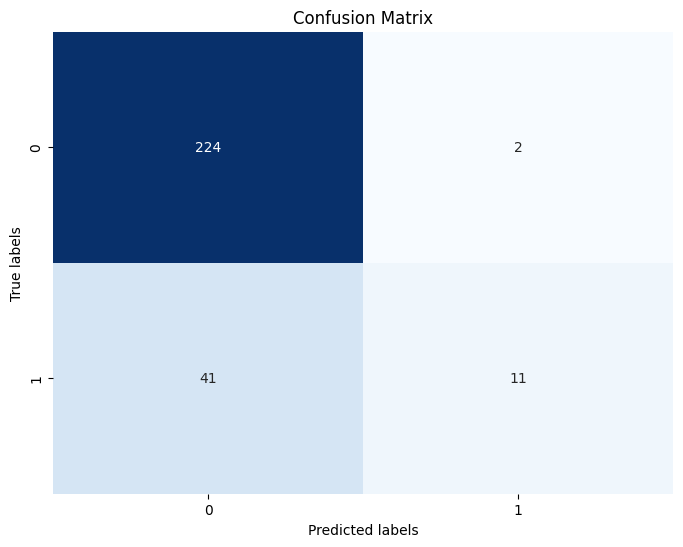

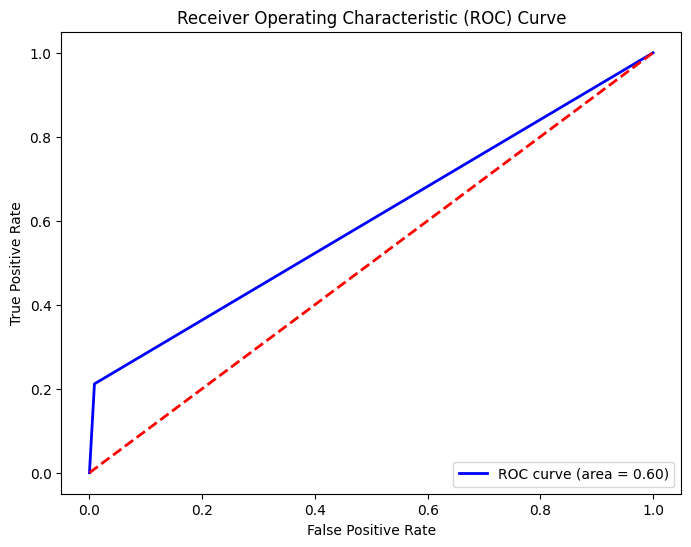

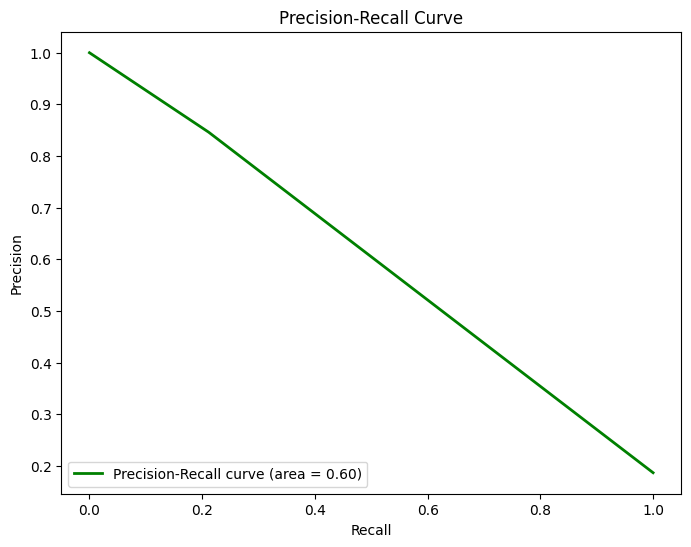

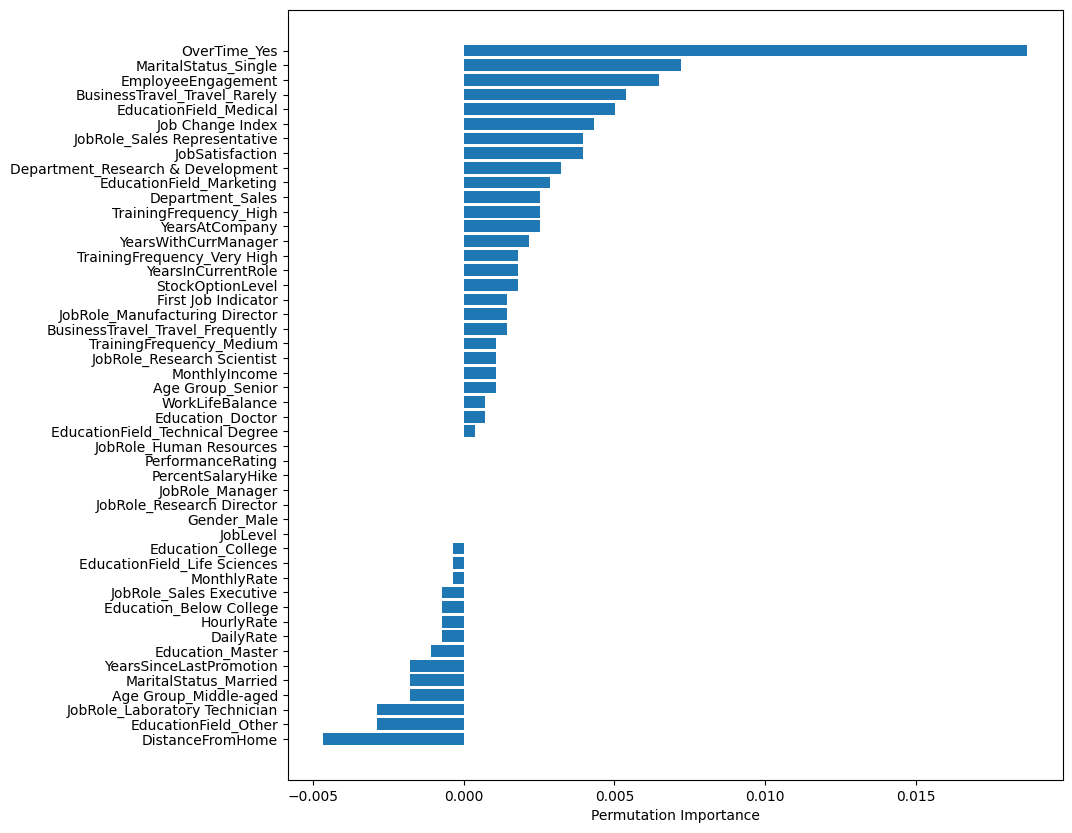

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()


    return y_pred, conf_matrix

def compute_permutation_importance(model, X_test, y_test):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    perm_sorted_idx = result.importances_mean.argsort()

    plt.figure(figsize=(10, 10))
    plt.barh(X_train.columns[perm_sorted_idx], result.importances_mean[perm_sorted_idx])
    plt.xlabel("Permutation Importance")
    plt.show()


svm_model = SVC()
evaluate_model(svm_model, X_train, y_train, X_test, y_test)
compute_permutation_importance(svm_model, X_test, y_test)


**Naive Bayes Model**

Accuracy: 0.36330935251798563
Precision: 0.21973094170403587
Recall: 0.9423076923076923
F1 Score: 0.3563636363636363
Confusion Matrix:
 [[ 52 174]
 [  3  49]]


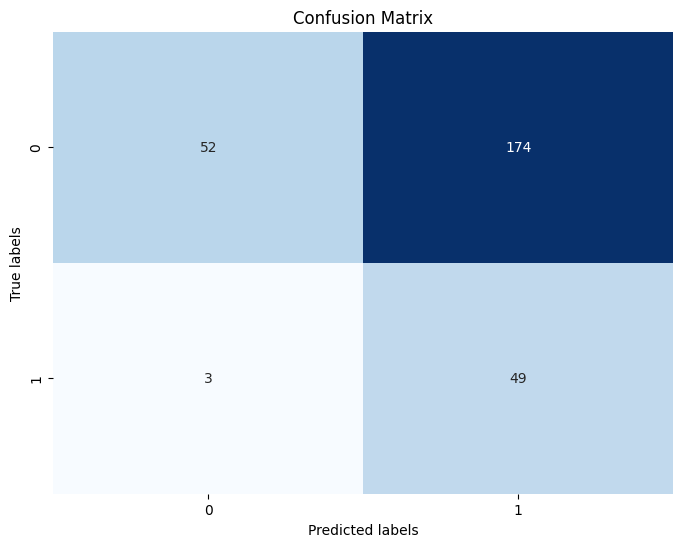

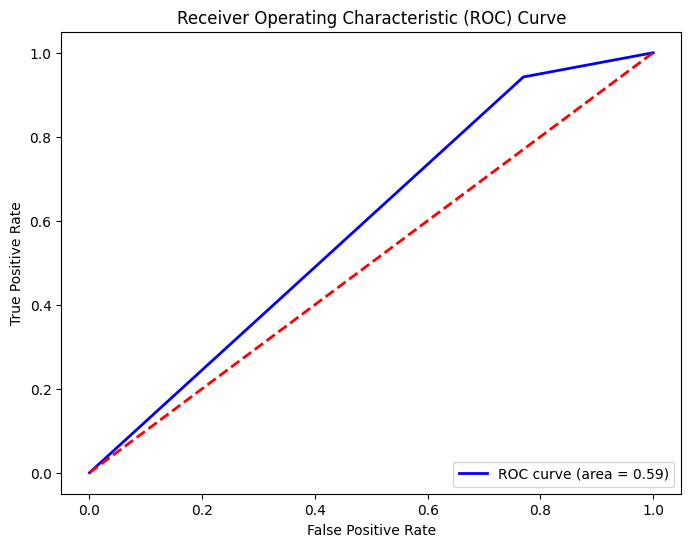

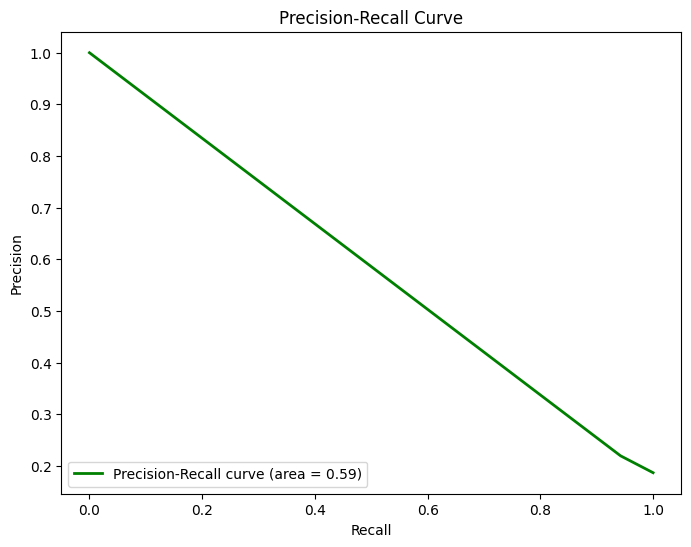

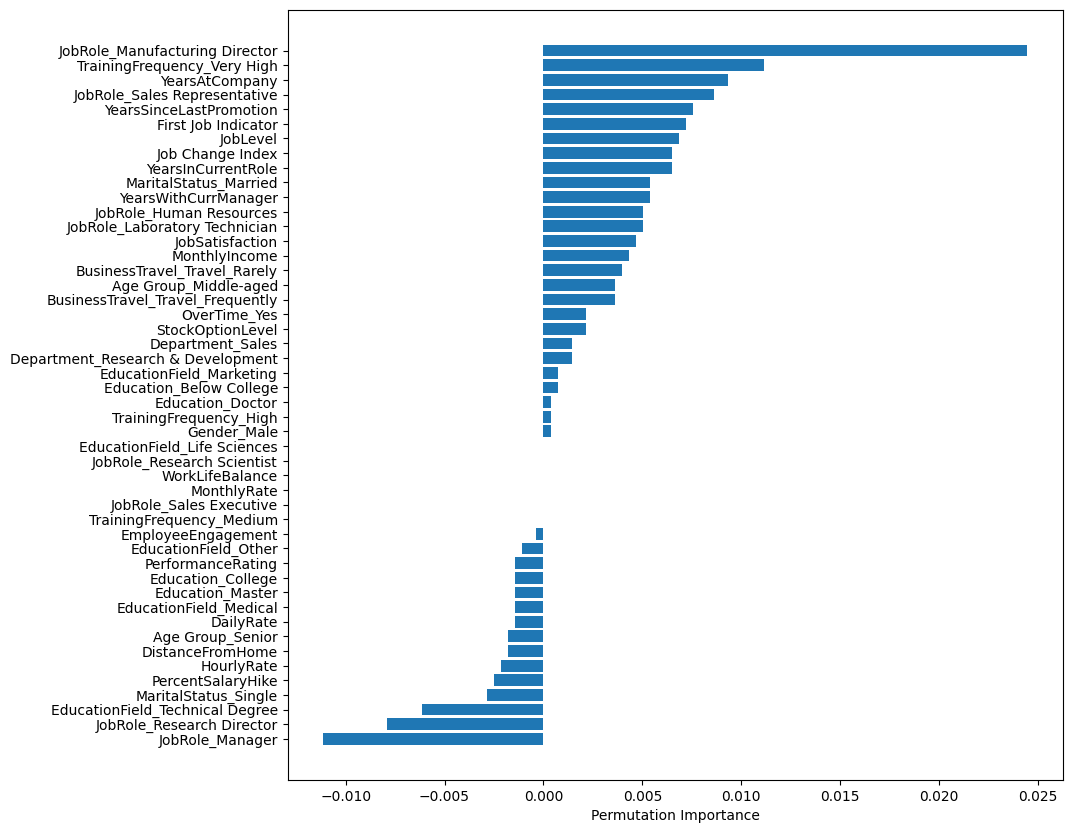

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
evaluate_model(naive_bayes_model, X_train, y_train, X_test, y_test)
compute_permutation_importance(naive_bayes_model, X_test, y_test)

**KNN Model**

Accuracy: 0.8345323741007195
Precision: 0.75
Recall: 0.17307692307692307
F1 Score: 0.28124999999999994
Confusion Matrix:
 [[223   3]
 [ 43   9]]


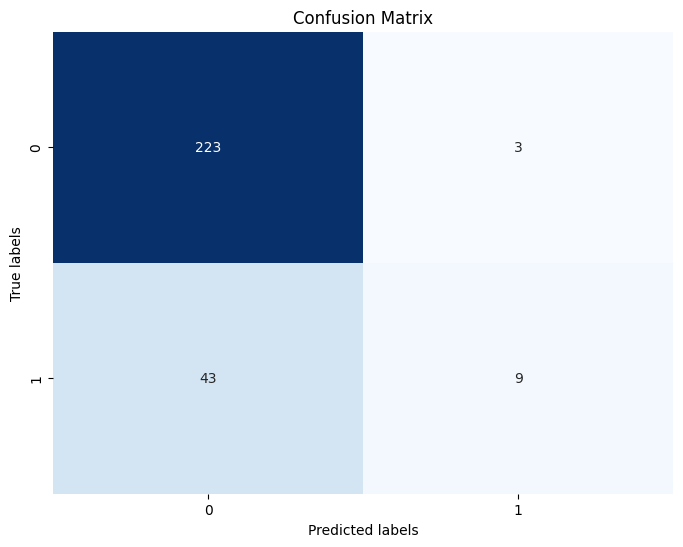

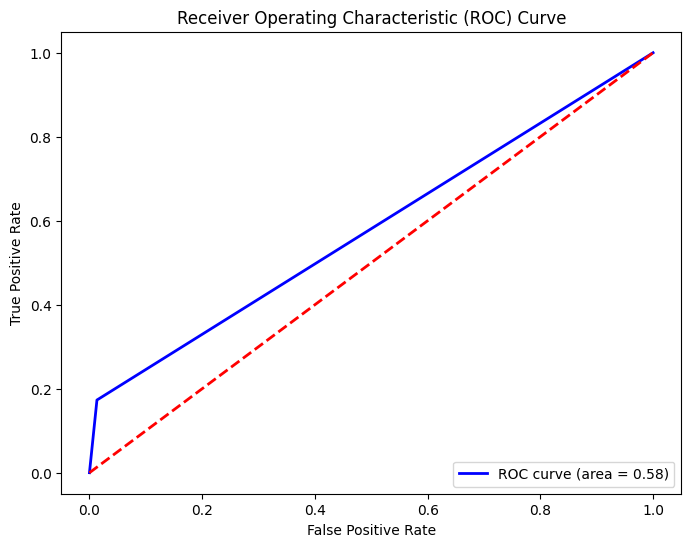

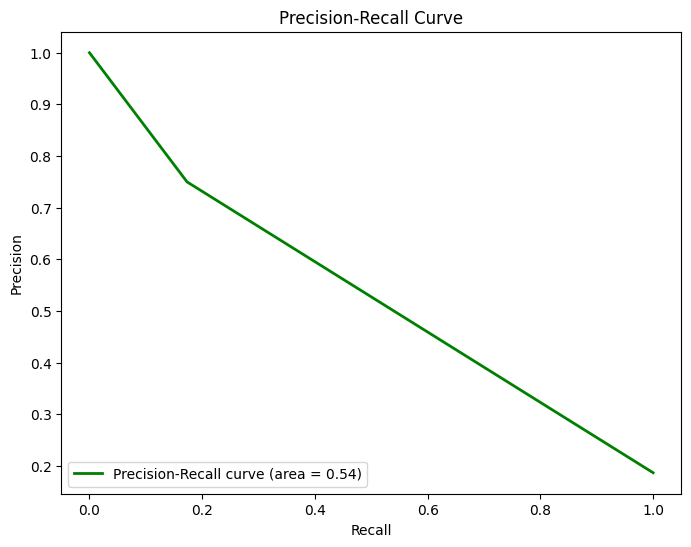

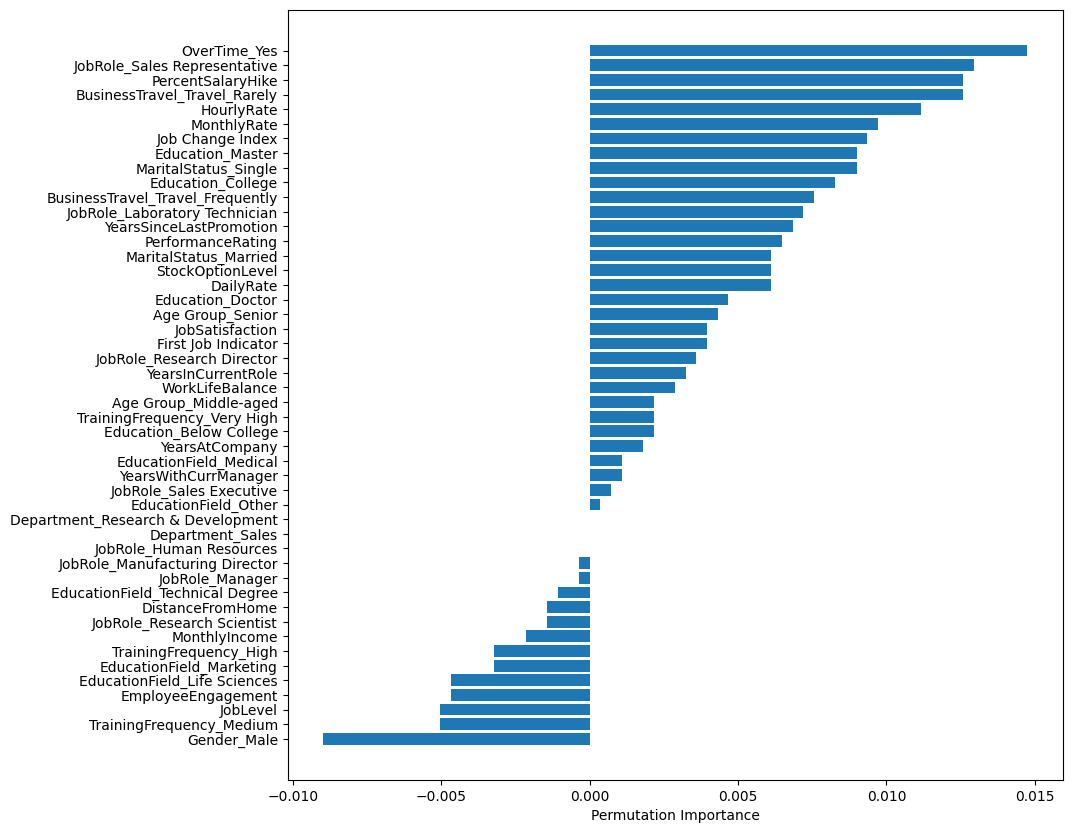

In [ ]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, y_train, X_test, y_test)
compute_permutation_importance(knn_model, X_test, y_test)

**Ensemble Methods**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the ensemble model (Random Forest)
ensemble_model = RandomForestClassifier(n_estimators=100)
_ = prediction_evaluation(ensemble_model, X_train, X_test,
                                            y_train, y_test, X_train.columns,
                                            'features')


RandomForestClassifier()

Classification report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       226
           1       0.90      0.17      0.29        52

    accuracy                           0.84       278
   macro avg       0.87      0.58      0.60       278
weighted avg       0.85      0.84      0.79       278


Accuracy Score:  0.8417
F1 Score:  0.2903
Area Under Curve:  0.5843 



<ipython-input-64-39a1e7b5c250>:5: DeprecationWarning:

`round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Recall: This metric tells us the proportion of employees who actually left the company that were predicted to leave by the model. On analyzing all the models, Naive Bayes seems to have the highest recall value but very low accuracy and precision. Post that Logistic Regression has the highes Recall of 44%, an accuracy of 87% and a precision of 74%. Hence, **Logistic Regression** seems to be the best choice for our case.

**Hyper Parameter Tuning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

X = X_train
y = y_train

# Define hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],
    'class_weight': [None, {0: 1, 1: 2}] #adding a value for 'class_weight' that favors the minority class i.e. employees who leave.
}

fix_params = {'random_state': 42}
logistic_model = LogisticRegression(**fix_params)
grid_search = GridSearchCV(estimator=logistic_model,scoring='recall', cv=5, param_grid = param_grid)
grid_search.fit(X, y)
best_model = grid_search.best_estimator_
best_params = {**fix_params, **grid_search.best_params_}
log_clf_all = LogisticRegression(**best_params)
log_clf_all.fit(X_train, y_train)
prediction_evaluation(log_clf_all, X_train, X_test, y_train, y_test, X_train.columns, "coefficients")
print(f"Best Hyperparameters: {grid_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

LogisticRegression(C=0.001, class_weight={0: 1, 1: 2}, random_state=42,
                   solver='liblinear')

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       226
           1       0.45      0.58      0.51        52

    accuracy                           0.79       278
   macro avg       0.68      0.71      0.69       278
weighted avg       0.81      0.79      0.80       278


Accuracy Score:  0.7914
F1 Score:  0.5085
Area Under Curve:  0.7088 



<ipython-input-76-4a3ecd8c1a47>:40: DeprecationWarning:

`round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Best Hyperparameters: {'C': 0.001, 'class_weight': {0: 1, 1: 2}, 'penalty': 'l2', 'solver': 'liblinear'}


After tuning the hyperparamters, the recall value increases upto **58%**.